# Разведочный анализ данных + Подготовка отчётов

# Самостоятельное задание 1

In [31]:
df_gender_by_country = df_gender_by_country[['male', 'female', 'group']]
df_gender_by_country

borrower_genders,male,female,group
country,,,
Madagascar,21.617378,78.304109,0.078513
Haiti,22.830293,74.599226,2.570481
Rwanda,22.865627,34.387528,42.746845
Ecuador,24.236373,72.635160,3.128467
Tajikistan,25.459653,74.182840,0.357508
Lebanon,27.070064,60.748408,12.181529
Bolivia,27.367704,42.414263,30.218033
Nicaragua,28.698752,50.072150,21.229098
Honduras,31.401556,57.023029,11.575416


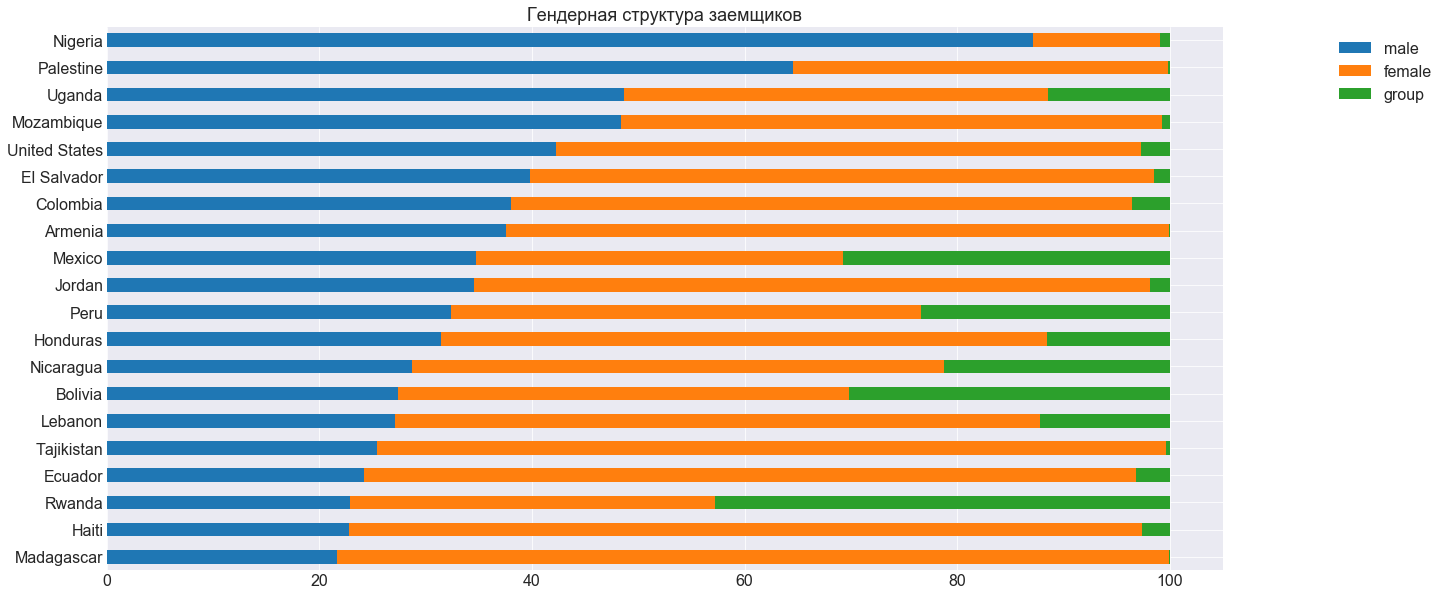

In [32]:
plot = df_gender_by_country.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

Мужчины-заемщики преобладают в странах Нигерия и Палестина

In [33]:
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['group'])[-20:]
df_gender_by_country

borrower_genders,female,group,male
country,,,
Uganda,39.876705,11.421776,48.701519
Honduras,57.023029,11.575416,31.401556
Lebanon,60.748408,12.181529,27.070064
Kenya,65.570722,14.864491,19.564787
Indonesia,58.046347,20.856131,21.097522
Nicaragua,50.072150,21.229098,28.698752
Peru,44.267530,23.357172,32.375298
Zimbabwe,66.633614,29.474467,3.891919
Bolivia,42.414263,30.218033,27.367704


In [34]:
df_gender_by_country = df_gender_by_country[['group', 'male', 'female']]
df_gender_by_country

borrower_genders,group,male,female
country,,,
Uganda,11.421776,48.701519,39.876705
Honduras,11.575416,31.401556,57.023029
Lebanon,12.181529,27.070064,60.748408
Kenya,14.864491,19.564787,65.570722
Indonesia,20.856131,21.097522,58.046347
Nicaragua,21.229098,28.698752,50.072150
Peru,23.357172,32.375298,44.267530
Zimbabwe,29.474467,3.891919,66.633614
Bolivia,30.218033,27.367704,42.414263


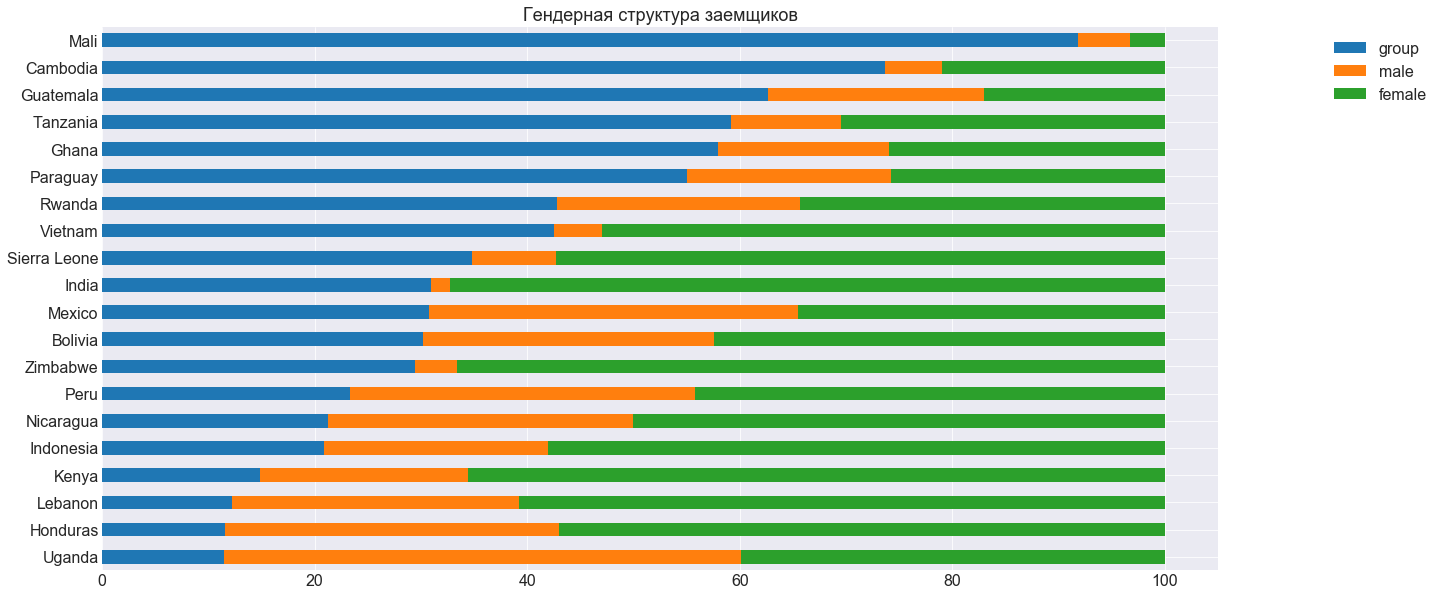

In [35]:
plot = df_gender_by_country.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

Коллективные заемщики преобладают в странах Мали, Камбоджа, Гватемала, Танзания, Гана и Парагвай

# Самостоятельное задание 2

In [51]:
df_kiva_loans_big = df_kiva_loans[(df_kiva_loans['loan_amount'] >= 20000) & (df_kiva_loans['loan_amount'] < 200000)]
df_kiva_loans_big.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI
34196,687045,50000.0,50000.0,Renewable Energy Products,Retail,to buy and sell Barefoot Power's Solar Lightin...,PE,Peru,Arequipa,USD,...,2014-04-18 06:32:55+00:00,14.0,1446,"user_favorite, user_favorite, #Eco-friendly, #...",male,irregular,2014-03-21,PER,Latin America and Caribbean,0.053080
36570,689415,20000.0,20000.0,Bakery,Food,to purchase a vehicle to distribute her local ...,IQ,Iraq,NaN,USD,...,2014-04-16 20:57:31+00:00,26.0,686,"user_favorite, user_favorite, #Biz Durable Ass...",female,monthly,2014-03-26,IRQ,Arab States,0.050222
38725,691328,25000.0,25000.0,Construction Supplies,Construction,To supply construction materials for a vocatio...,RW,Rwanda,Kigali,USD,...,2014-04-16 22:14:29+00:00,7.0,821,"user_favorite, #Repeat Borrower, #Unique, #Job...",male,irregular,2014-03-31,RWA,Sub-Saharan Africa,0.242800
42697,695319,20000.0,20000.0,Beauty Salon,Services,to expand her salon’s space and services to in...,IQ,Iraq,NaN,USD,...,2014-04-18 00:50:04+00:00,26.0,366,"user_favorite, #Job Creator, #Woman Owned Biz,...",female,monthly,2014-04-08,IRQ,Arab States,0.050222
43182,695450,50000.0,50000.0,Renewable Energy Products,Retail,To buy and sell Barefoot Power's solar lightin...,KE,Kenya,Nairobi,USD,...,2014-04-19 19:27:30+00:00,16.0,1491,"user_favorite, user_favorite, user_favorite, u...",male,bullet,2014-04-09,KEN,Sub-Saharan Africa,0.209375


In [52]:
countries_big = df_kiva_loans_big['country'].value_counts()[df_kiva_loans_big['country'].value_counts() > 3]
list_countries_big = list(countries_big.index)
countries_big

Kenya       14
Mexico      12
Peru        12
Uganda       8
Tanzania     7
Rwanda       6
Haiti        6
Ghana        6
Name: country, dtype: int64

In [53]:
df_kiva_loans_big_constrained = df_kiva_loans_big[df_kiva_loans_big['country'].isin(countries_big.index.values)]
df_kiva_loans_big_constrained.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI
34196,687045,50000.0,50000.0,Renewable Energy Products,Retail,to buy and sell Barefoot Power's Solar Lightin...,PE,Peru,Arequipa,USD,...,2014-04-18 06:32:55+00:00,14.0,1446,"user_favorite, user_favorite, #Eco-friendly, #...",male,irregular,2014-03-21,PER,Latin America and Caribbean,0.053080
38725,691328,25000.0,25000.0,Construction Supplies,Construction,To supply construction materials for a vocatio...,RW,Rwanda,Kigali,USD,...,2014-04-16 22:14:29+00:00,7.0,821,"user_favorite, #Repeat Borrower, #Unique, #Job...",male,irregular,2014-03-31,RWA,Sub-Saharan Africa,0.242800
43182,695450,50000.0,50000.0,Renewable Energy Products,Retail,To buy and sell Barefoot Power's solar lightin...,KE,Kenya,Nairobi,USD,...,2014-04-19 19:27:30+00:00,16.0,1491,"user_favorite, user_favorite, user_favorite, u...",male,bullet,2014-04-09,KEN,Sub-Saharan Africa,0.209375
53634,706146,50000.0,50000.0,Renewable Energy Products,Retail,To buy and sell Barefoot Power solar lighting.,UG,Uganda,Kampala,USD,...,2014-05-18 15:31:08+00:00,14.0,1581,"#Eco-friendly, #Biz Durable Asset, #Post-disbu...",female,bullet,2014-05-06,UGA,Sub-Saharan Africa,0.375300
70499,722883,100000.0,100000.0,Agriculture,Agriculture,create more than 300 jobs for women and farmer...,HT,Haiti,Les Cayes,USD,...,2014-06-19 20:21:04+00:00,75.0,2986,"user_favorite, user_favorite, user_favorite, u...",female,irregular,2014-06-10,HTI,Latin America and Caribbean,0.293800


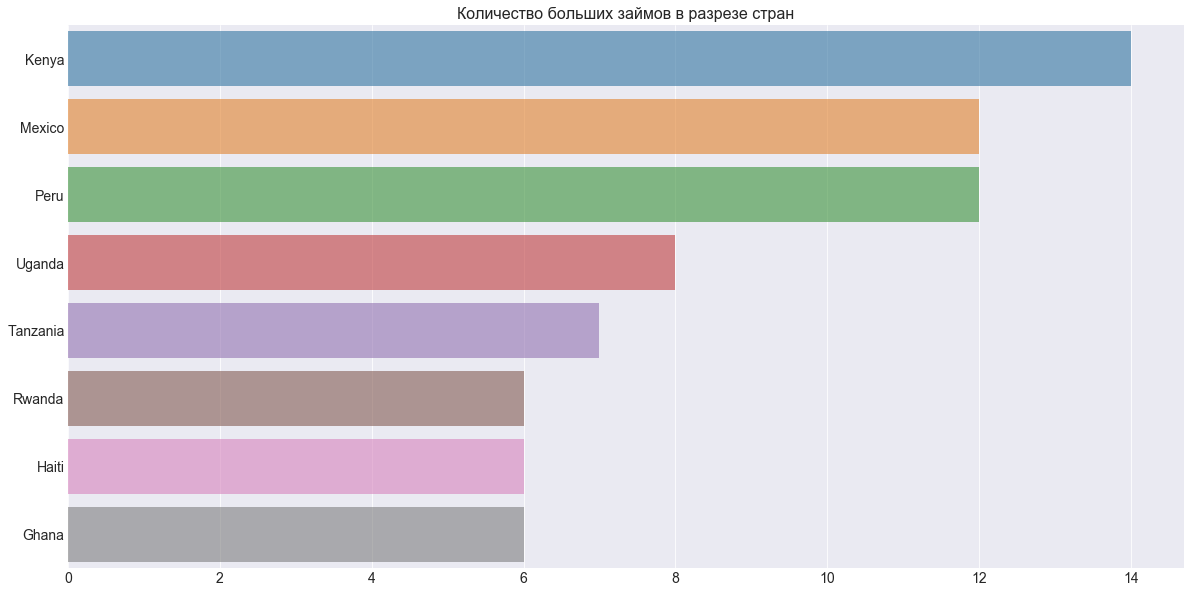

In [54]:
plt.figure(figsize=(20,10))
plt.title("Количество больших займов в разрезе стран", fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(y=countries_big.index, x=countries_big.values, alpha=0.6)
plt.show()

In [55]:
regions_big = df_kiva_loans_big_constrained['world_region'].value_counts()
regions_list_big = regions_big.index.to_list()
regions_big

Sub-Saharan Africa             34
Latin America and Caribbean    30
Name: world_region, dtype: int64

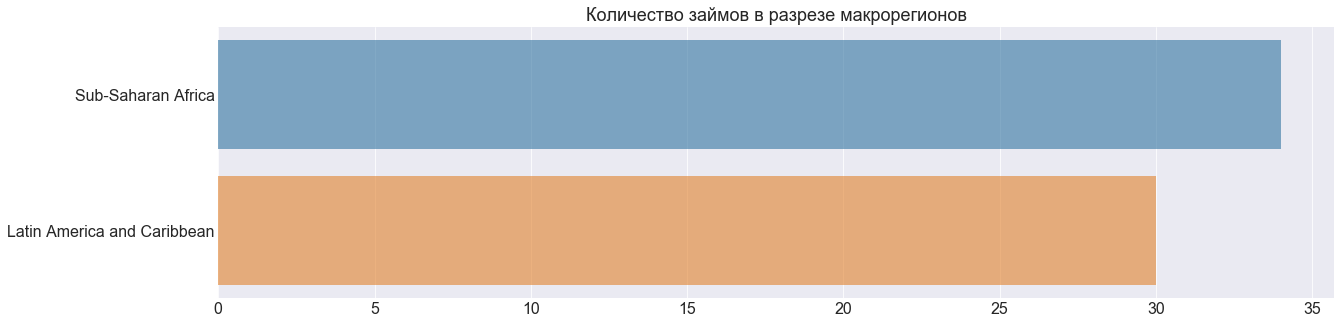

In [56]:
plt.figure(figsize=(20,5))
sns.barplot(y=regions_big.index, x=regions_big.values, alpha=0.6)
plt.title("Количество займов в разрезе макрорегионов", fontsize=18)
plt.tick_params(labelsize=16)
plt.show();

In [57]:
borrowers_big = df_kiva_loans_big_constrained['borrower_genders'].value_counts()
borrowers_big

male      35
female    23
group     13
Name: borrower_genders, dtype: int64

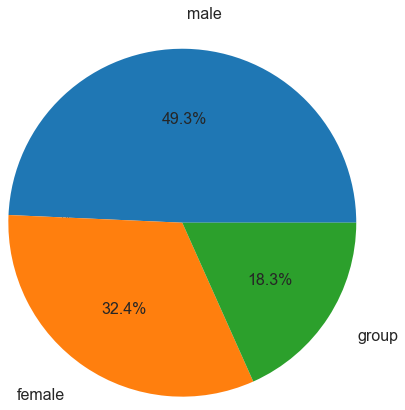

In [58]:
plot = borrowers_big.plot.pie(fontsize=16, autopct='%1.1f%%', labeldistance=1.2, radius=2)

In [59]:
df_gender_by_country_big = \
    df_kiva_loans_big[df_kiva_loans_big['country'].isin(countries_big.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['male', 'female'])

df_gender_by_country_big = df_gender_by_country_big[['male', 'female', 'group']]
df_gender_by_country_big

borrower_genders,male,female,group
country,,,
Haiti,16.666667,66.666667,16.666667
Mexico,33.333333,0.000000,66.666667
Ghana,33.333333,66.666667,0.000000
Kenya,42.857143,50.000000,7.142857
Tanzania,42.857143,57.142857,0.000000
Peru,58.333333,25.000000,16.666667
Uganda,75.000000,12.500000,12.500000
Rwanda,100.000000,0.000000,0.000000


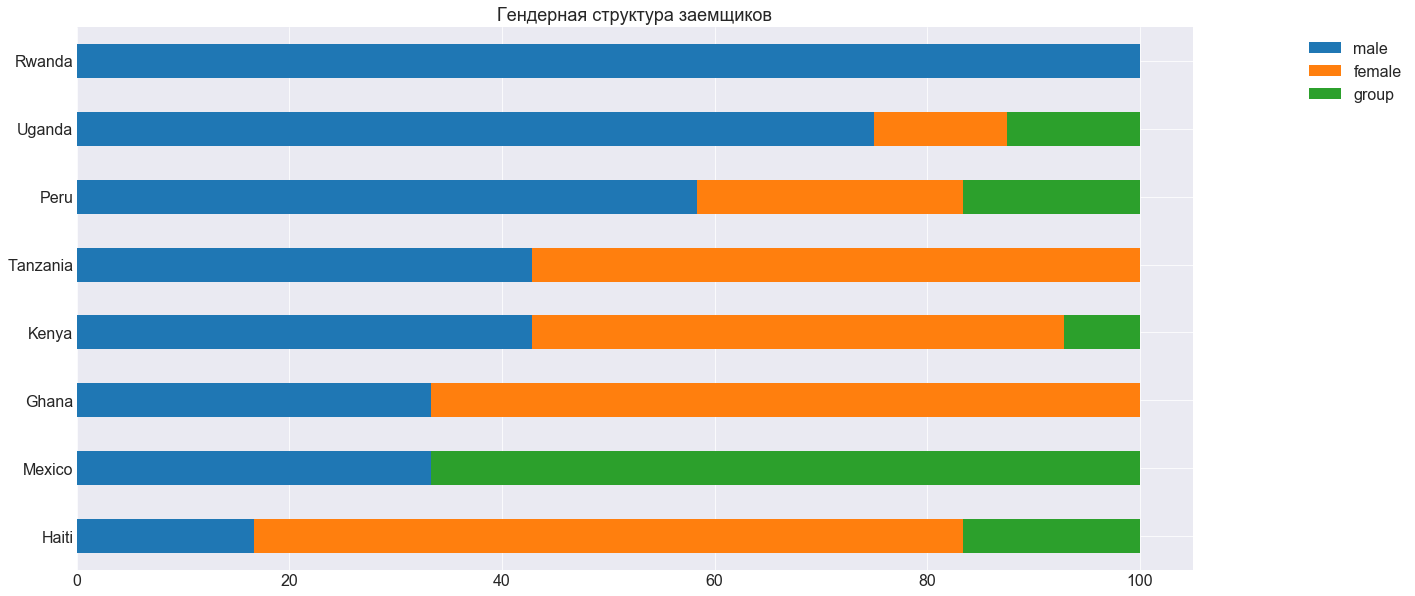

In [60]:
plot = df_gender_by_country_big.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

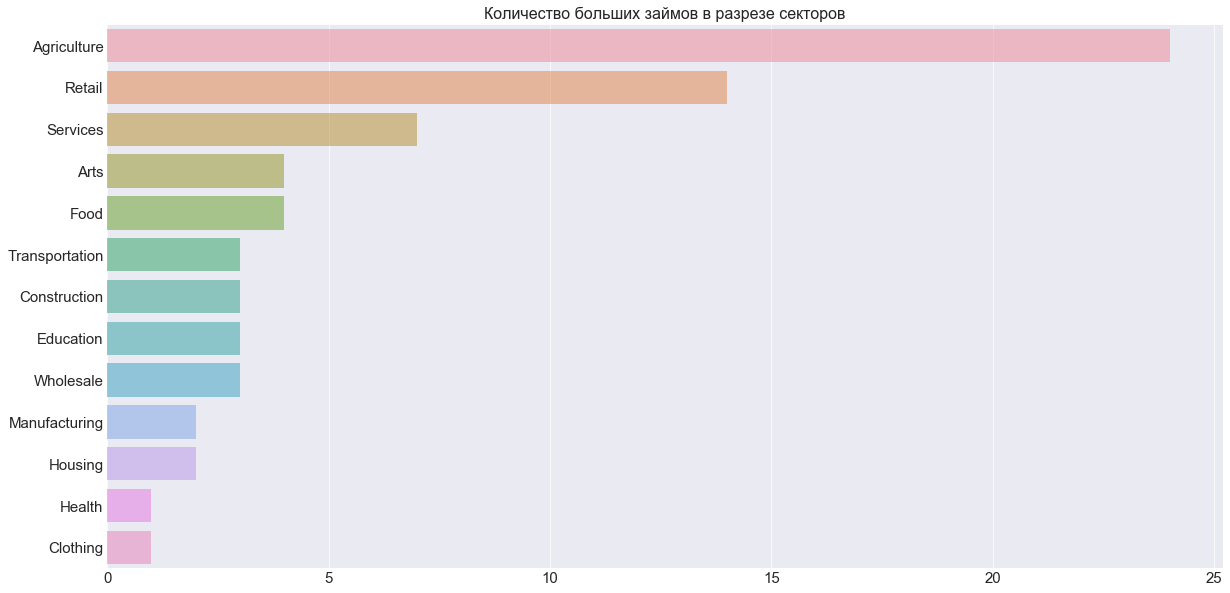

In [61]:
sectors_big = df_kiva_loans_big_constrained['sector'].value_counts()

plt.figure(figsize=(20,10))
plt.title("Количество больших займов в разрезе секторов", fontsize=16)
plt.tick_params(labelsize=15)

sns.barplot(y=sectors_big.index, x=sectors_big.values, alpha=0.6)
plt.show()

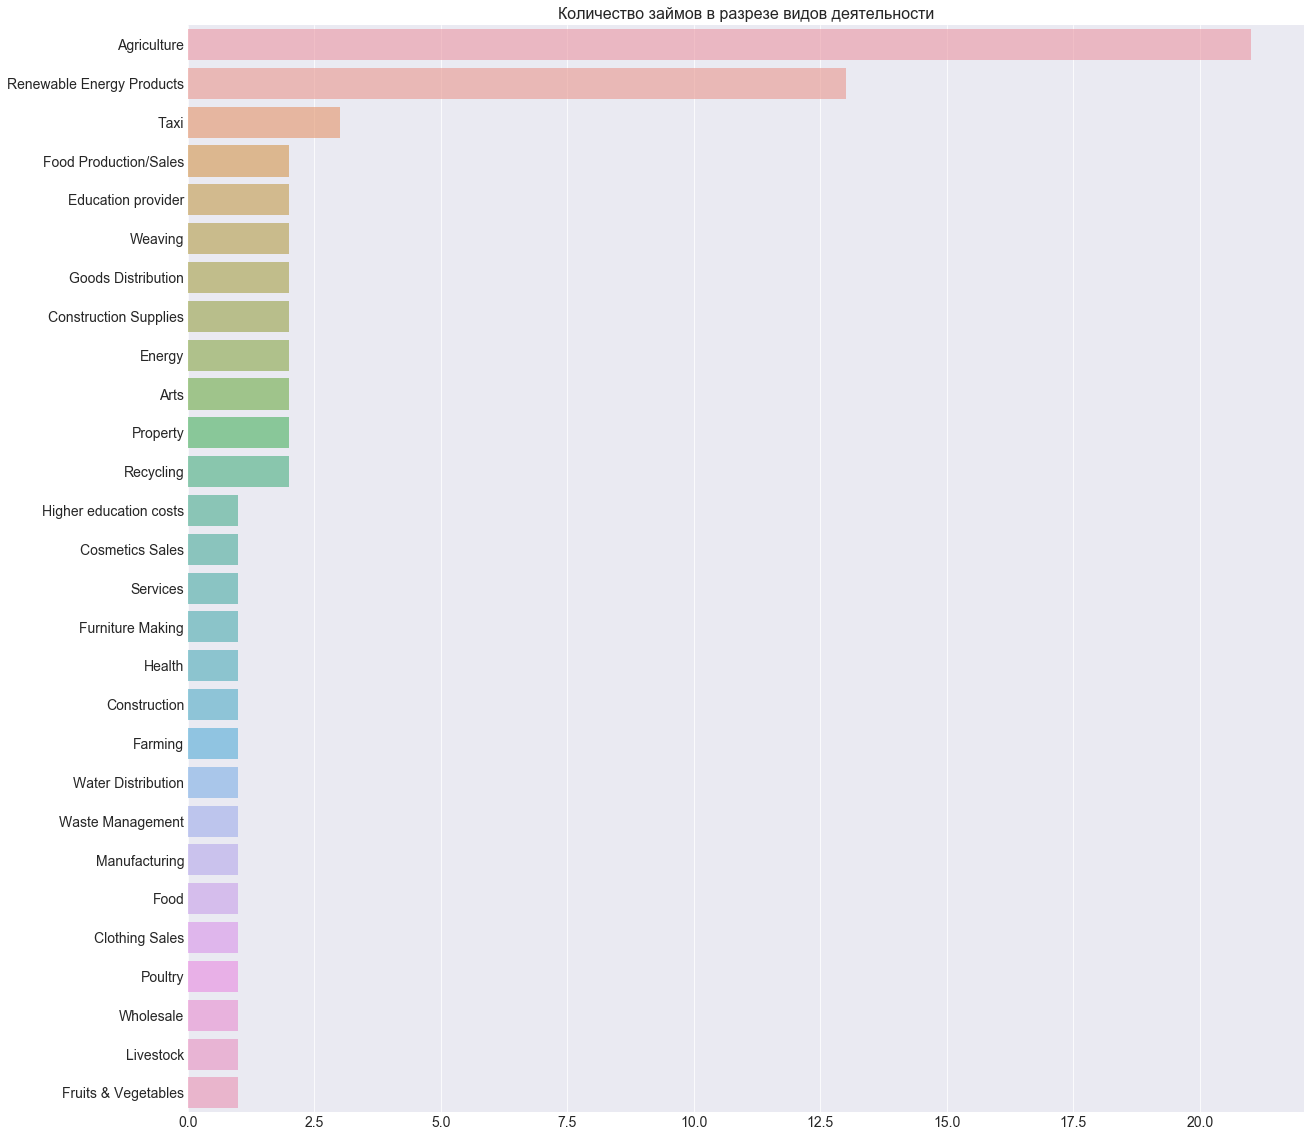

In [62]:
activities_big = df_kiva_loans_big_constrained['activity'].value_counts()

plt.figure(figsize=(20,20))
plt.title("Количество займов в разрезе видов деятельности", fontsize=16)
plt.tick_params(labelsize=14)

sns.barplot(y=activities_big.index, x=activities_big.values, alpha=0.6)
plt.show();

In [63]:
activities_big = df_kiva_loans_big_constrained['use'].value_counts()
activities_big.head(20)

to import and stock clean energy products such as solar lights or improved cookstoves                                           2
To buy and plant resin producing pine trees – the resin will be harvested annually, providing income for many years.            2
To supply construction materials for a vocational training program.                                                             2
to buy and plant resin producing pine trees. The resin will be harvested annually, providing income for many years              2
to purchase approximately 5,000 units of solar products, primarily small solar lamps with charging capabilities                 1
increase smallholder farmers’ incomes by buying unsold fruit that would otherwise go to waste and selling it as dried fruit.    1
To grow his factory to 100% capacity and serve as a bridge loan for larger investments.                                         1
to import and stock clean energy products such as solar lights or improved cookstoves.    

Тройка лидеров стран с займами более 20000 долларов - Кения, Перу и Мексика. Далее следуют Уганда, Танзания, Гана, Руанда и Гаити. Среди макрорегионов верхние позиции занимают Северная Африка и Латинская Америка.
Гендерный состав заявителей: половина заемщиков - мужчины, треть - женщины, и только пятая часть  - это коллективные заявки. Больше всего заемщиков-мужчин в Руанде, Уганде и Перу; женщин - в Гане, Гаити, Танзании и Кении. Показатель групповых заявок преобладает из перечисленных стран только в Мексике, и он значительно выше, чем в какой-либо другой стране.
В разрезе секторов преобладают сельское хозяйство и ритейл. Среди видов деятельности пальму первенства делят также агропромышленный комплекс и развитие возобновляемых источников энергии - неископаемых источников, таких как ветер, солнечная энергия, геотермальная, энергия волн и т.д. Деньги нужны на покупку сырья, найм и обучение сотрудников, закупку оборудования для улучшения качества жизни в бедных странах, развитие и поддержание отраслей с помощью новых технологий.

# Самостоятельное задание 3

In [64]:
loans_by_gender_region_median = \
    df_kiva_loans\
    .groupby(['world_region', 'borrower_genders'])['loan_amount']\
    .median()\
    .reset_index()
loans_by_gender_region_median # Медианные значения кратны 25 - скорее всего Kiva предлагает именно такую градацию по суммам займов

,world_region,borrower_genders,loan_amount
0,Arab States,female,1000.0
1,Arab States,group,950.0
2,Arab States,male,750.0
3,East Asia and the Pacific,female,300.0
4,East Asia and the Pacific,group,200.0
5,East Asia and the Pacific,male,450.0
6,Europe and Central Asia,female,900.0
7,Europe and Central Asia,group,1000.0
8,Europe and Central Asia,male,1000.0
9,Latin America and Caribbean,female,625.0


In [65]:
loans_by_gender_region_median.world_region.unique() # Всего потребуется 6 графиков

array(['Arab States', 'East Asia and the Pacific',
       'Europe and Central Asia', 'Latin America and Caribbean',
       'South Asia', 'Sub-Saharan Africa'], dtype=object)

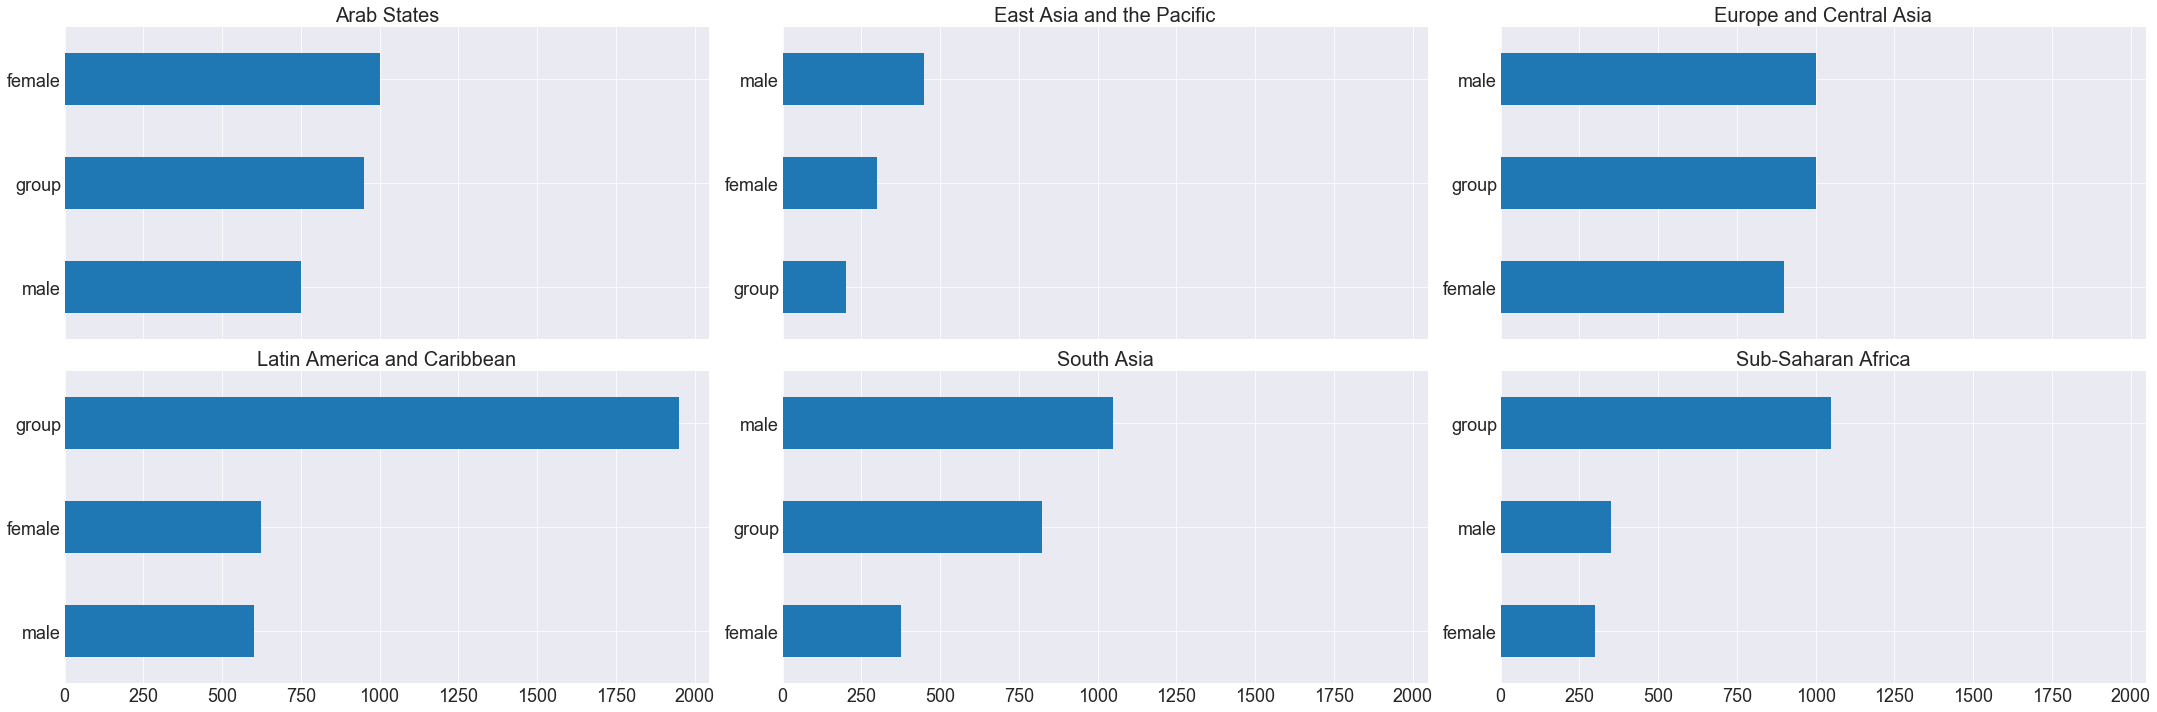

In [66]:
fig,axes = plt.subplots(2,3, sharex=True, squeeze=False, figsize=(30,10))

for ax,q in zip(axes.ravel(), loans_by_gender_region_median.world_region.unique()):
    tmp_df = loans_by_gender_region_median[loans_by_gender_region_median.world_region.eq(q)]\
                .dropna()\
                .sort_values(by=['loan_amount'])
    ax.set_title(q, fontsize=20)  
    ax.yaxis.label.set_visible(False)
    plt.tight_layout()
    
    tmp_df.plot.barh(x='borrower_genders', ax=ax, legend=None, fontsize=18)

In [67]:
loans_by_gender_region_mean = \
    df_kiva_loans\
    .groupby(['world_region', 'borrower_genders'])['loan_amount']\
    .mean()\
    .reset_index()

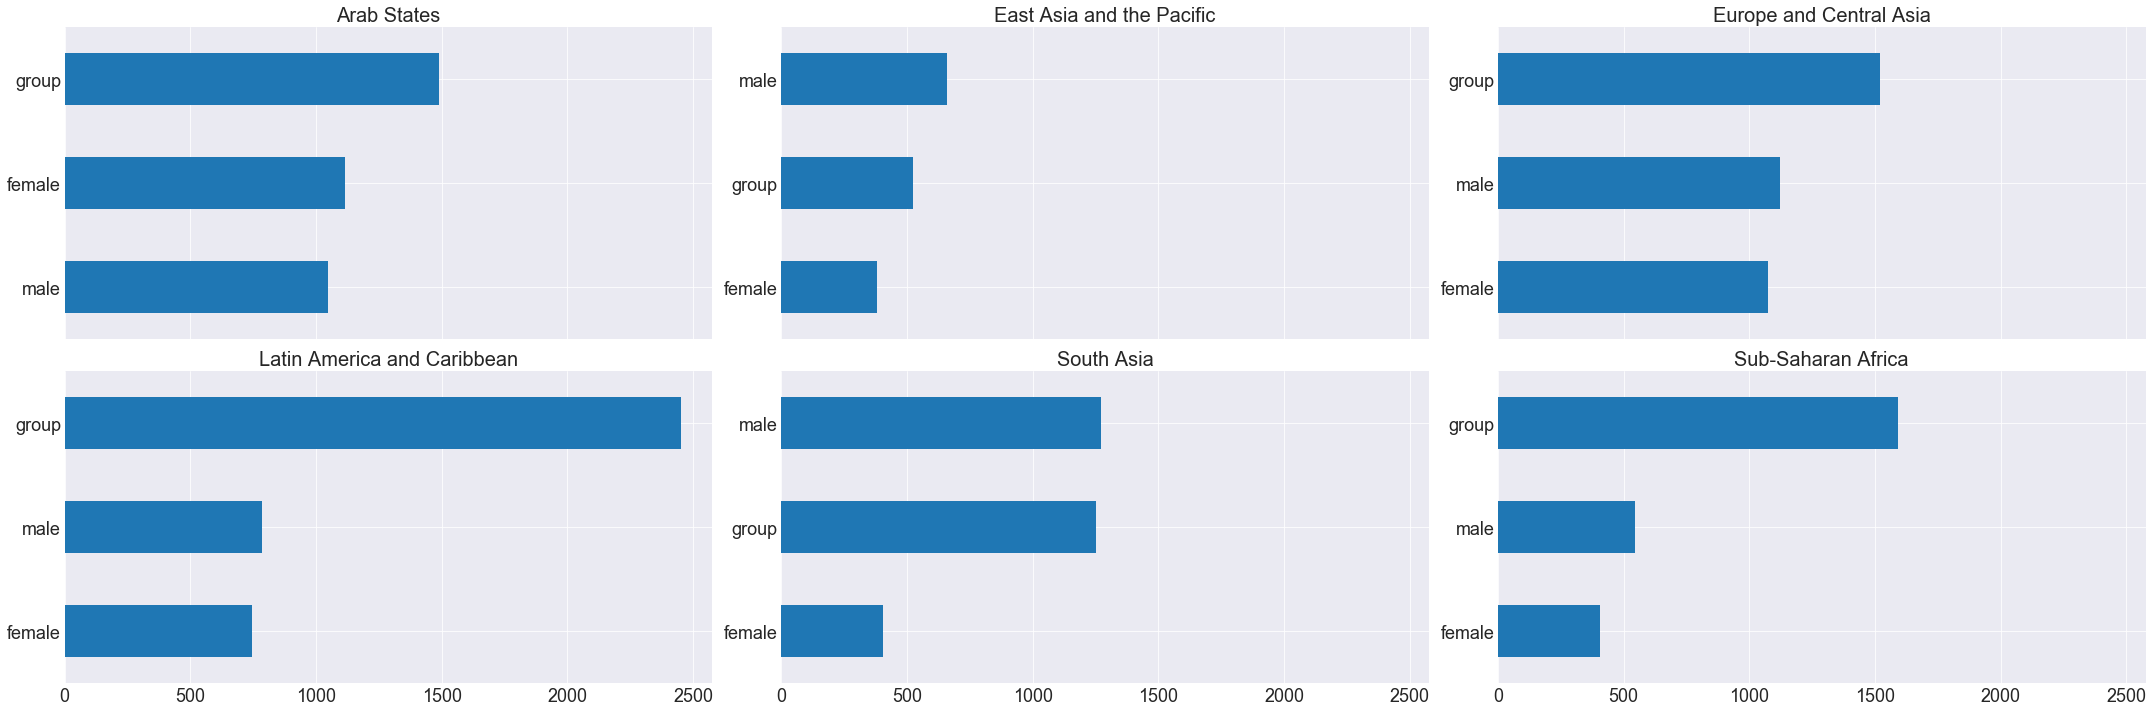

In [68]:
fig,axes = plt.subplots(2,3, sharex=True, squeeze=False, figsize=(30,10))

for ax,q in zip(axes.ravel(), loans_by_gender_region_mean.world_region.unique()):
    tmp_df = loans_by_gender_region_mean[loans_by_gender_region_mean.world_region.eq(q)]\
                .dropna()\
                .sort_values(by=['loan_amount'])
    ax.set_title(q, fontsize=20)  
    ax.yaxis.label.set_visible(False)
    plt.tight_layout()
    
    tmp_df.plot.barh(x='borrower_genders', ax=ax, legend=None, fontsize=18)

В целом верно утверждение, что чем выше сумма заявки, тем чаще заемщиками становятся группы людей.
Особенно наглядно это демонстрируют регионы Латинсокой Америки и Северной Африки. В Латинской Америке самые высокие значения по коллективным займам среди других макрорегионов, а внутри региона они трехкратно преобладают над займами среди персональных мужских или персональных женскиx (или в полтора раза над всеми персональными).
Также сравнивая медианные и средние значения в каждом регионе, становится очевидным, что доля заявок с более крупными суммами поступает в основном от групповой категории заемщиков. Но если продолжать двигаться в сторону самых крупных займов от 20 тысяч долларов и выше (статистические выбросы), то как выяснилось ранее, первенство захватывают заещики мужского пола, а групповые уходят на последний план.
Схожей по суммам займов выглядит ситуация в Арабских странах и Центральной Азии, только меняются местами мужской и женский пол заемщиков, но в целоми распределение между группами более ровное, чем в других макрорегионах.
В Южной и Восточной Азии более крупные суммы занимают мужчины. В Южной Азии стоимость займа мужчины в среднем в три раза превышает стоимость займа женщины.

In [69]:
loans_by_gender_country_median = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries[:].index.values)]\
    .groupby(['country', 'borrower_genders'])['loan_amount']\
    .median()\
    .reset_index()

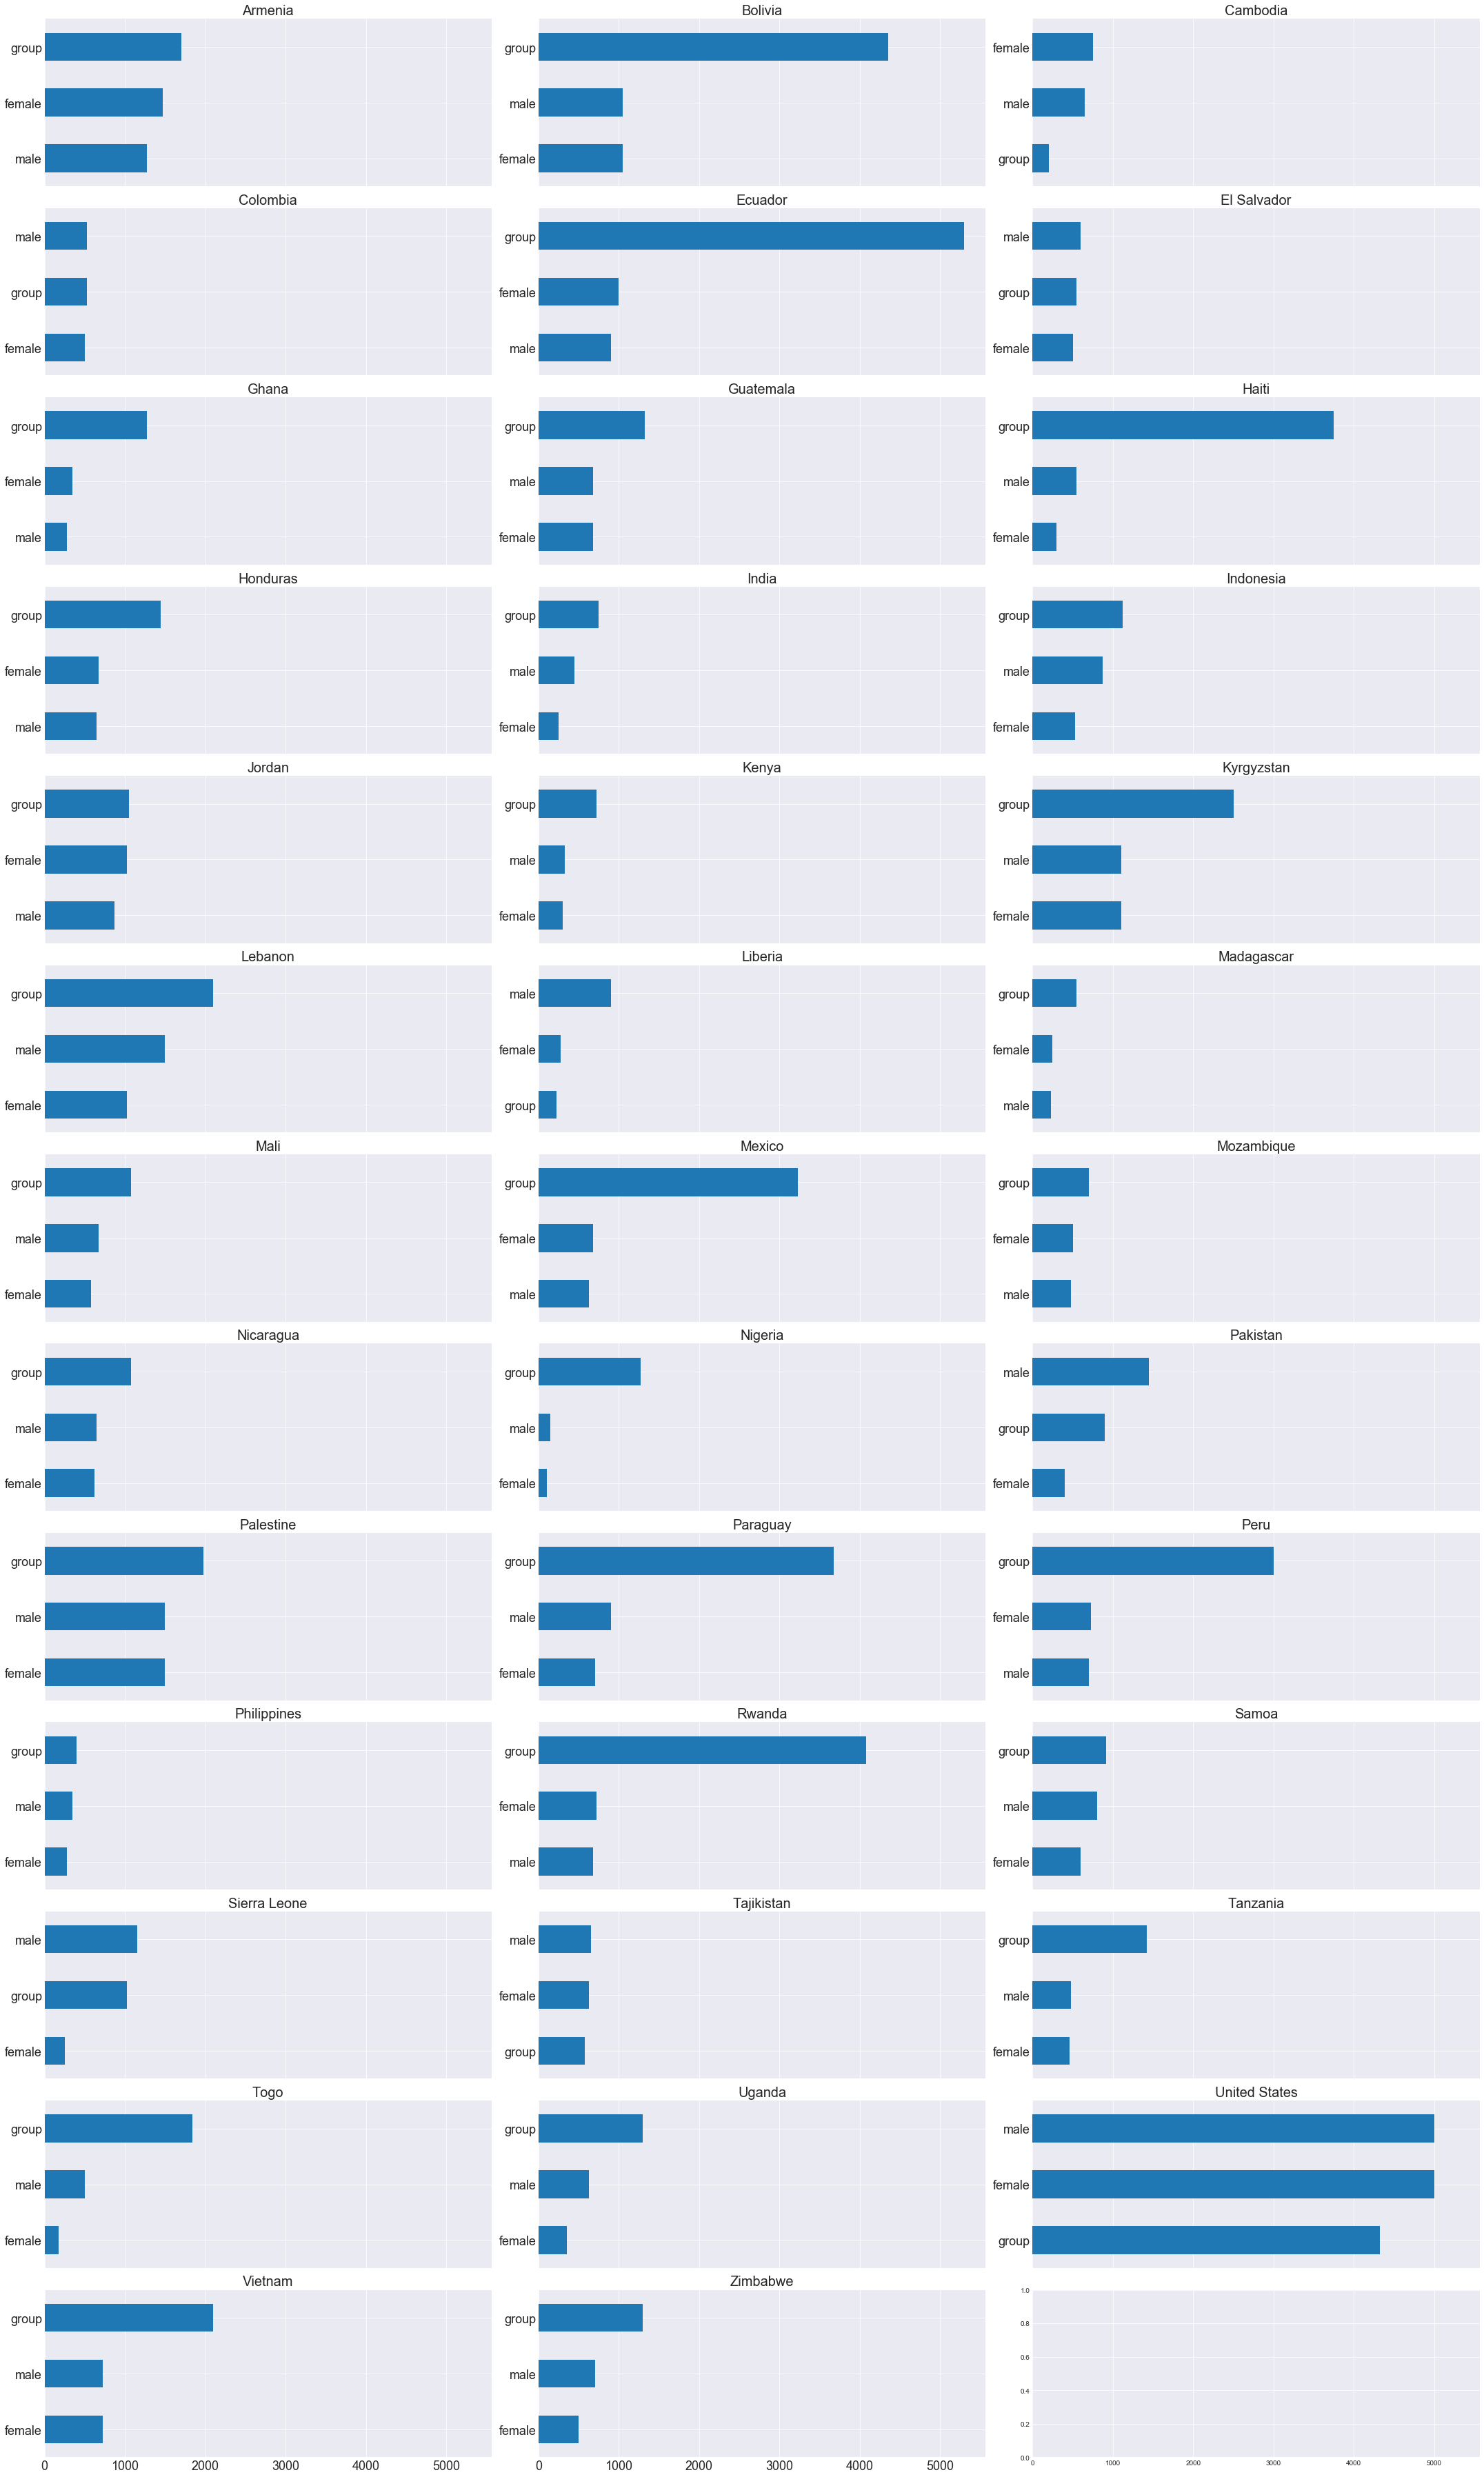

In [70]:
fig,axes = plt.subplots(13,3, sharex=True, squeeze=False, figsize=(30,50))

for ax,q in zip(axes.ravel(), loans_by_gender_country_median.country.unique()):
    tmp_df = loans_by_gender_country_median[loans_by_gender_country_median.country.eq(q)]\
                .dropna()\
                .sort_values(by=['loan_amount'])
    ax.set_title(q, fontsize=20)  
    ax.yaxis.label.set_visible(False)
    plt.tight_layout()
    
    tmp_df.plot.barh(x='borrower_genders', ax=ax, legend=None, fontsize=18)

In [71]:
loans_by_gender_country_mean = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries[:].index.values)]\
    .groupby(['country', 'borrower_genders'])['loan_amount']\
    .mean()\
    .reset_index()
loans_by_gender_country_mean


,country,borrower_genders,loan_amount
0,Armenia,female,1570.527587
1,Armenia,group,1641.666667
2,Armenia,male,1373.289676
3,Bolivia,female,1358.835341
4,Bolivia,group,4329.556558
...,...,...,...
109,Vietnam,group,2271.705384
110,Vietnam,male,761.145194
111,Zimbabwe,female,589.415923
112,Zimbabwe,group,1421.846089


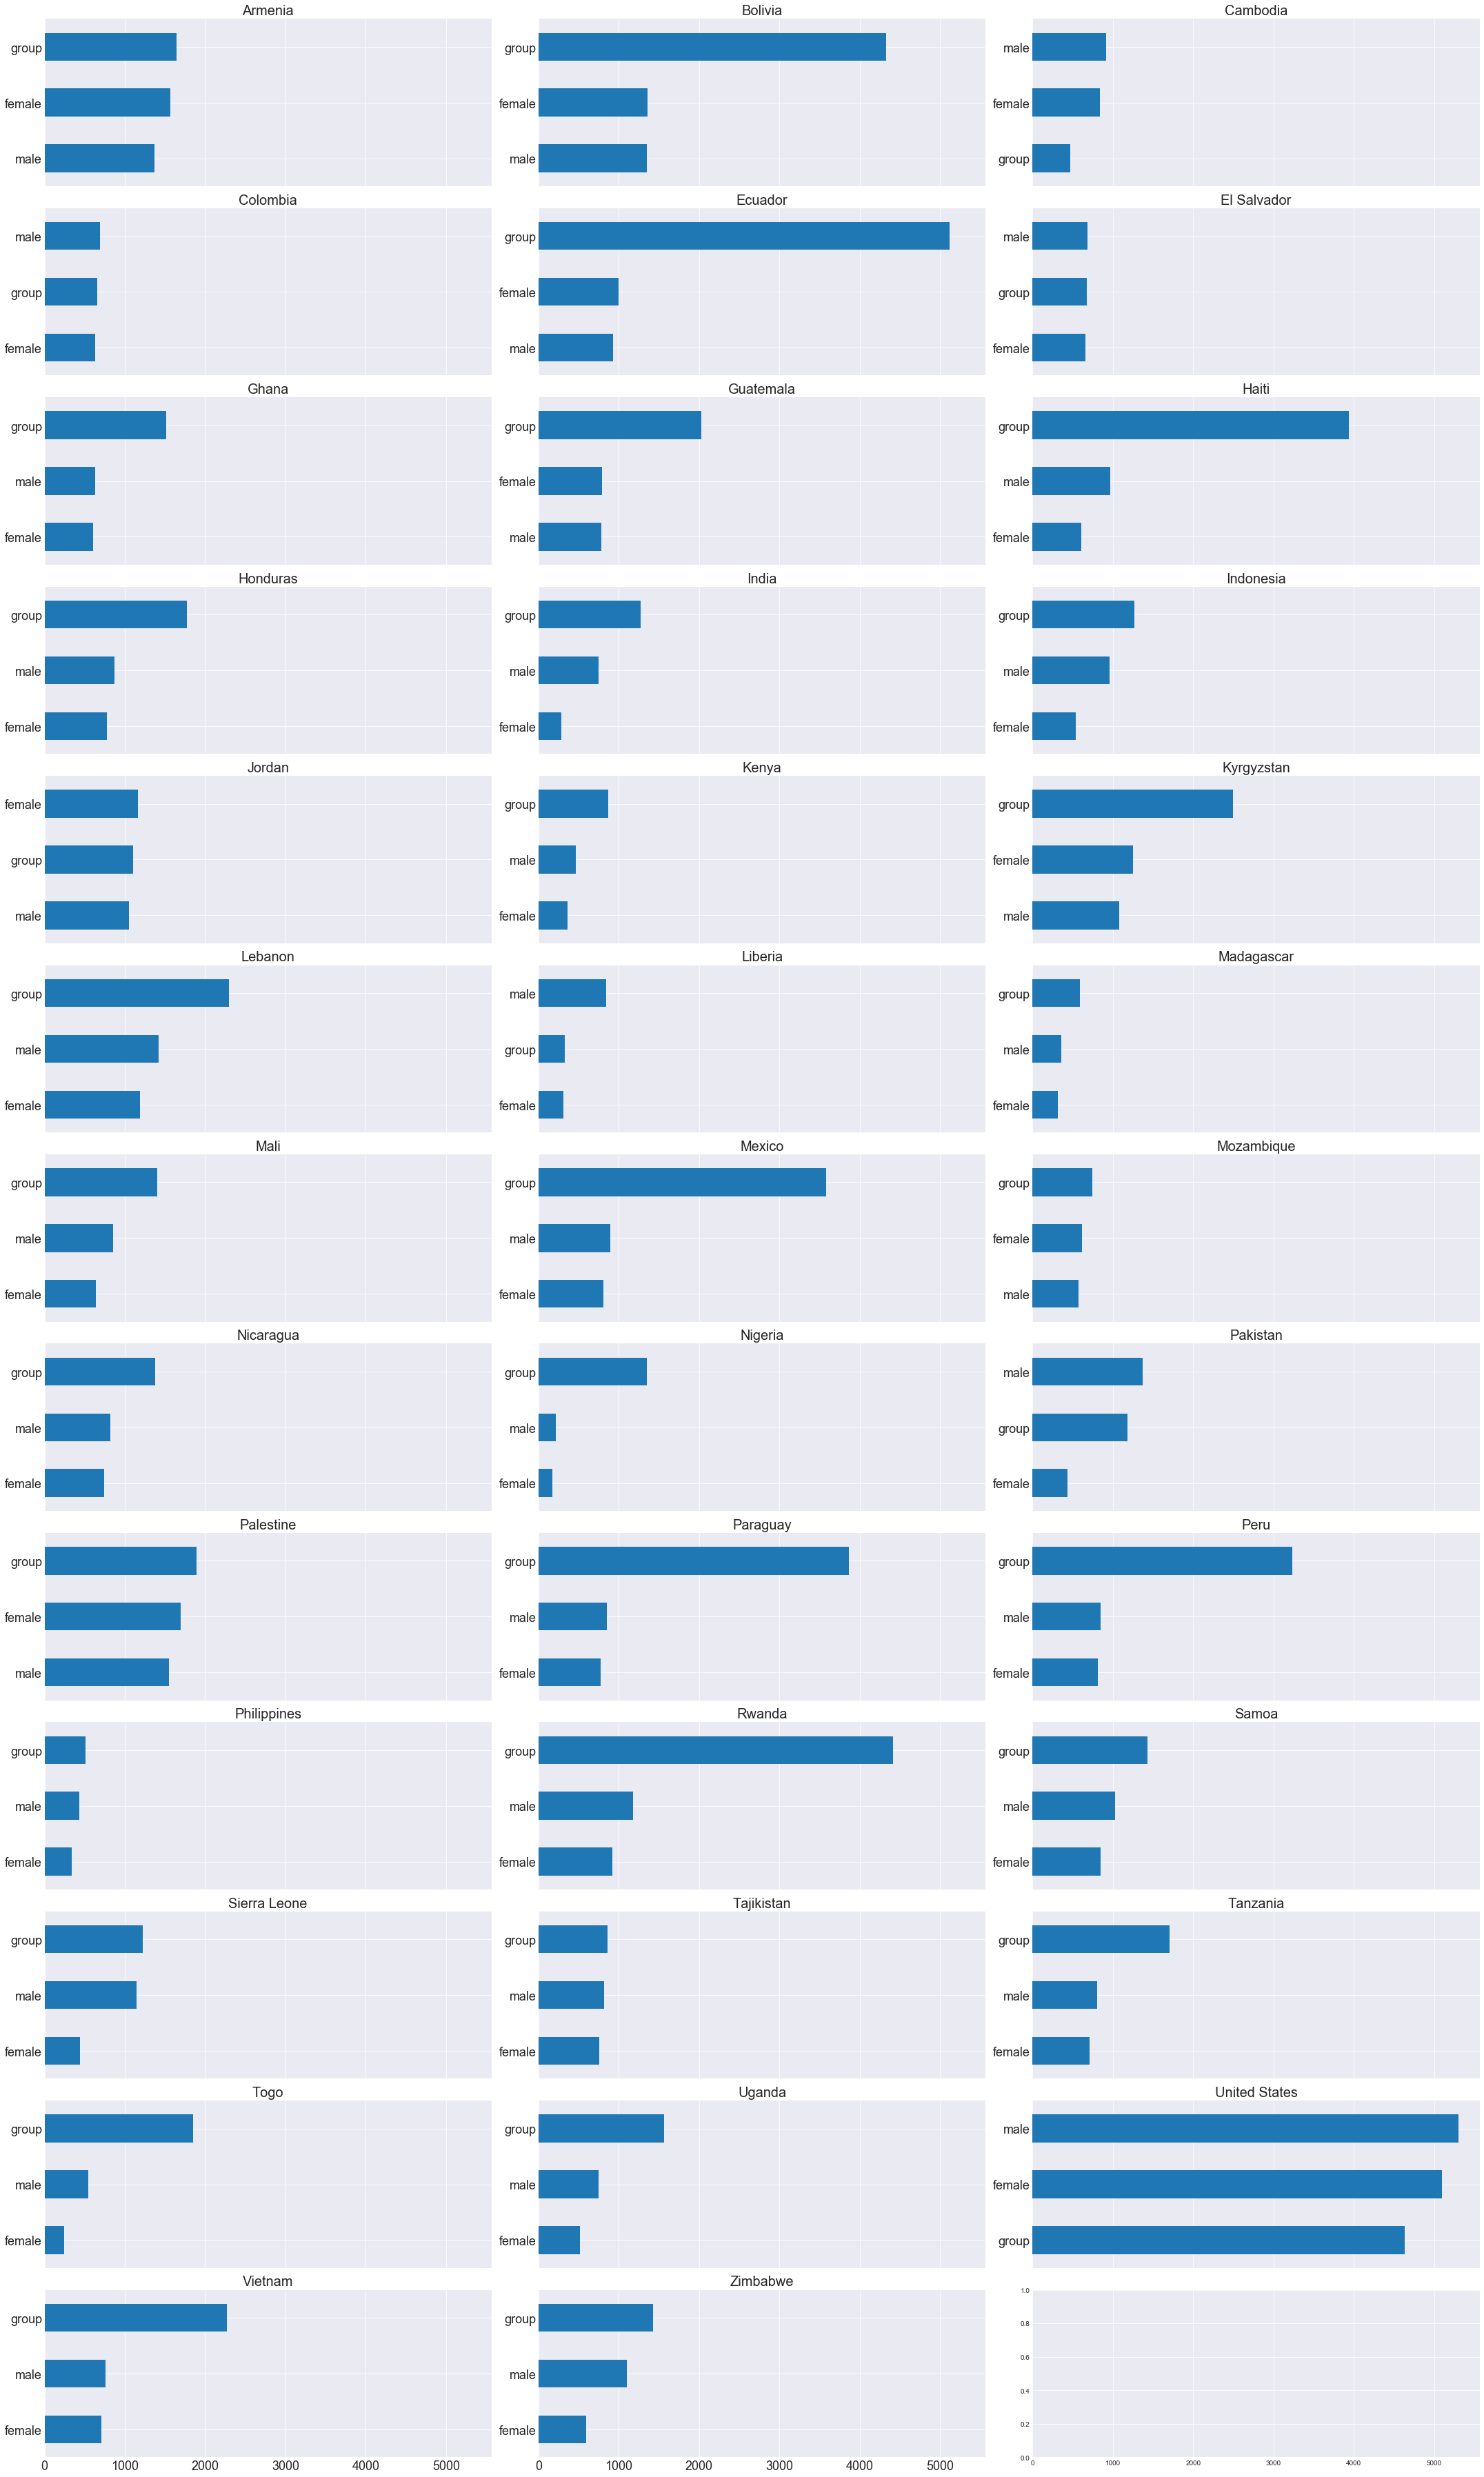

In [72]:
fig,axes = plt.subplots(13,3, sharex=True, squeeze=False, figsize=(30,50))

for ax,q in zip(axes.ravel(), loans_by_gender_country_mean.country.unique()):
    tmp_df = loans_by_gender_country_mean[loans_by_gender_country_mean.country.eq(q)]\
                .dropna()\
                .sort_values(by=['loan_amount'])
    ax.set_title(q, fontsize=20)  
    ax.yaxis.label.set_visible(False)
    plt.tight_layout()
    
    tmp_df.plot.barh(x='borrower_genders', ax=ax, legend=None, fontsize=18)

Графики в разрезе стран подтверждают факт заимствования более крупных сумм групповой категорией заемщиков. Особенно ярко это видно на примере таких государств как: Боливия, Эквадор, Гаити, Мексика, Парагвай, Перу, Руанда, - где средняя сумма коллективного займа находится в диапазоне от 3-х до 5-ти с лишним тысяч долларов и как минимум трижды преобладает над средней суммой займа остальных категорий заемщиков. Далее с более низкими суммами идут Вьетнам, Киргизия, Того, Уганда, Ливан, Гватемала, Гондурас, Гана, Танзания. В Нигерии средний займ группой составляет 1300 долларов, а персональный 100-200 долларов.
Из 38 представленных стран, только в Либерии средняя сумма займа граждан мужского пола значительно выше других, но и сама сумма невысока - в среднем 800-900 долларов.
В остальных странах более сглаженные различия между суммами займов среди разных гендерных категорий.
Особняком стоят США. Здесь медианные значения сумм займов находятся в пределах 4000-5000 долларов, а средние значения еще выше. При этом максимальные значения сумм выданных займов не превышают 10000 долларов. Скорее всего это связано с политикой Kiva как некоммерческой организации ("позволяет нуждающимся более чем в 80 странах мира получать финансирование под различного рода проекты и нужды"), которая ограничивает сумму займа в более развитых регионах для равномерного распределения средств среди развивающихся экономик. При этом отсутсвие некоммерческой деятельности компании в странах Евросоюза (с ограничением максимальных сумм займов) и России (как стране с развивающейся экономикой) говорят о возможном расширении рынка в этих регионах.

# Домашнее задание 1

In [73]:
sectors.index.values

array(['Agriculture', 'Food', 'Retail', 'Services', 'Personal Use',
       'Housing', 'Clothing', 'Education', 'Transportation', 'Arts',
       'Health', 'Construction', 'Manufacturing', 'Entertainment',
       'Wholesale'], dtype=object)

In [74]:
df_gender_by_sector = \
    df_kiva_loans[df_kiva_loans['sector'].isin(sectors.index.values)]\
    .groupby(['sector', 'borrower_genders'])['borrower_genders'].count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['male', 'female'])

df_gender_by_sector = df_gender_by_sector[['male', 'female', 'group']]
df_gender_by_sector

borrower_genders,male,female,group
sector,,,
Clothing,8.124122,69.620060,22.255818
Arts,10.140962,73.250415,16.608624
Food,10.546844,72.269990,17.183167
Retail,11.474449,77.540283,10.985268
Personal Use,21.594063,24.279236,54.126701
Services,22.270713,67.328312,10.400975
Housing,24.763571,68.257686,6.978744
Agriculture,26.695211,55.243425,18.061364
Health,31.887672,57.053020,11.059308


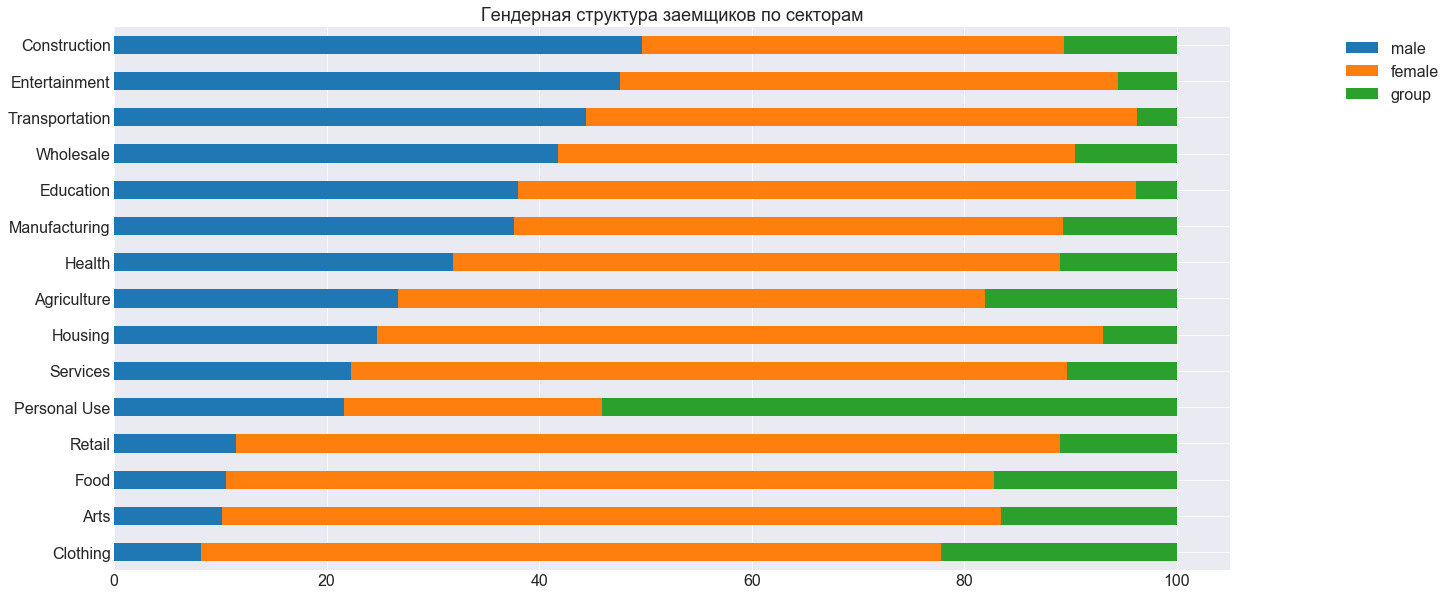

In [75]:
plot = df_gender_by_sector.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков по секторам')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

Практически во всех секторах преобладают заемщики-женщины, за исключением строительства, где преобладают мужчины и потребительских нужд, где преобладает коллективный тип заема.

In [76]:
regions.index.values

array(['East Asia and the Pacific', 'Sub-Saharan Africa',
       'Latin America and Caribbean', 'Europe and Central Asia',
       'South Asia', 'Arab States'], dtype=object)

In [77]:
df_gender_by_region = \
    df_kiva_loans[df_kiva_loans['world_region'].isin(regions.index.values)]\
    .groupby(['world_region', 'borrower_genders'])['borrower_genders'].count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['male', 'female'])

df_gender_by_region = df_gender_by_region[['male', 'female', 'group']]
df_gender_by_region

borrower_genders,male,female,group
world_region,,,
South Asia,2.903517,85.897205,11.199279
East Asia and the Pacific,6.118416,80.149216,13.732369
Sub-Saharan Africa,25.765026,52.347102,21.887872
Europe and Central Asia,28.905143,70.749736,0.345121
Latin America and Caribbean,33.522230,53.633774,12.843996
Arab States,42.440405,42.298901,15.260694


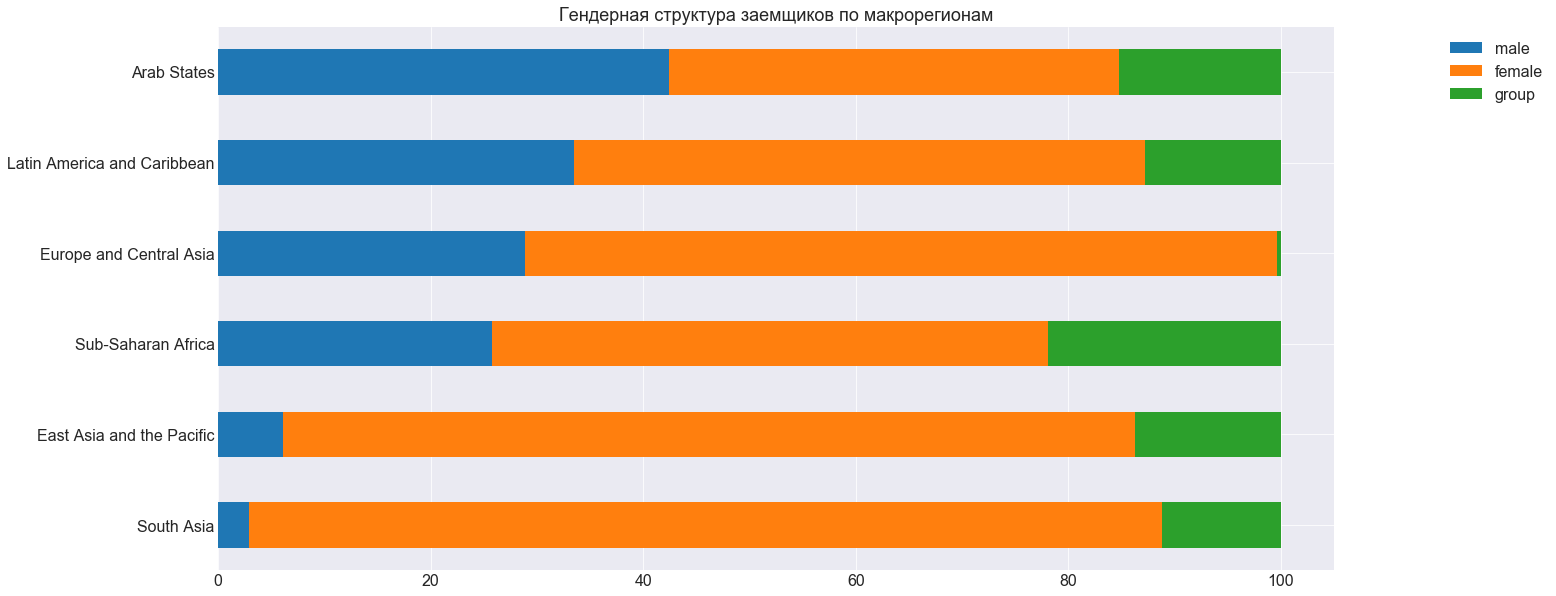

In [78]:
plot = df_gender_by_region.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков по макрорегионам')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

Идентично выглядит ситуация в разрезе макрорегионов. В Арабском регионе количество мужчин и женщин заемщиков делится примерно пополам. В остальных регионах явное преобладание "женских" заемов, особенно это выражено в Южной и Восточной Азии.

In [79]:
df_gender_by_sector_region = df_kiva_loans[df_kiva_loans['sector'].isin(sectors.index.values)]\
    .groupby(['world_region', 'sector', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: x)\
    .unstack('borrower_genders')\
    .fillna(0)
df_gender_by_sector_region = df_gender_by_sector_region[['male', 'female', 'group']]

df_gender_by_sector_region

borrower_genders                     male   female   group
world_region       sector                                 
Arab States        Agriculture      504.0    455.0    19.0
                   Arts              16.0    118.0     3.0
                   Clothing         104.0    441.0   159.0
                   Construction     131.0     17.0    65.0
                   Education       1152.0   1106.0    46.0
...                                   ...      ...     ...
Sub-Saharan Africa Personal Use    3381.0   2155.0   662.0
                   Retail          5719.0  16810.0  5232.0
                   Services        2480.0   6167.0   826.0
                   Transportation  2088.0    370.0    86.0
                   Wholesale         71.0     58.0    31.0

[90 rows x 3 columns]

In [80]:
df_gender_by_sector_region = df_gender_by_sector_region.reset_index()
df_gender_by_sector_region

borrower_genders,world_region,sector,male,female,group
0,Arab States,Agriculture,504.0,455.0,19.0
1,Arab States,Arts,16.0,118.0,3.0
2,Arab States,Clothing,104.0,441.0,159.0
3,Arab States,Construction,131.0,17.0,65.0
4,Arab States,Education,1152.0,1106.0,46.0
...,...,...,...,...,...
85,Sub-Saharan Africa,Personal Use,3381.0,2155.0,662.0
86,Sub-Saharan Africa,Retail,5719.0,16810.0,5232.0
87,Sub-Saharan Africa,Services,2480.0,6167.0,826.0
88,Sub-Saharan Africa,Transportation,2088.0,370.0,86.0


In [81]:
df_gender_by_sector_region.sector.unique()

array(['Agriculture', 'Arts', 'Clothing', 'Construction', 'Education',
       'Entertainment', 'Food', 'Health', 'Housing', 'Manufacturing',
       'Personal Use', 'Retail', 'Services', 'Transportation',
       'Wholesale'], dtype=object)

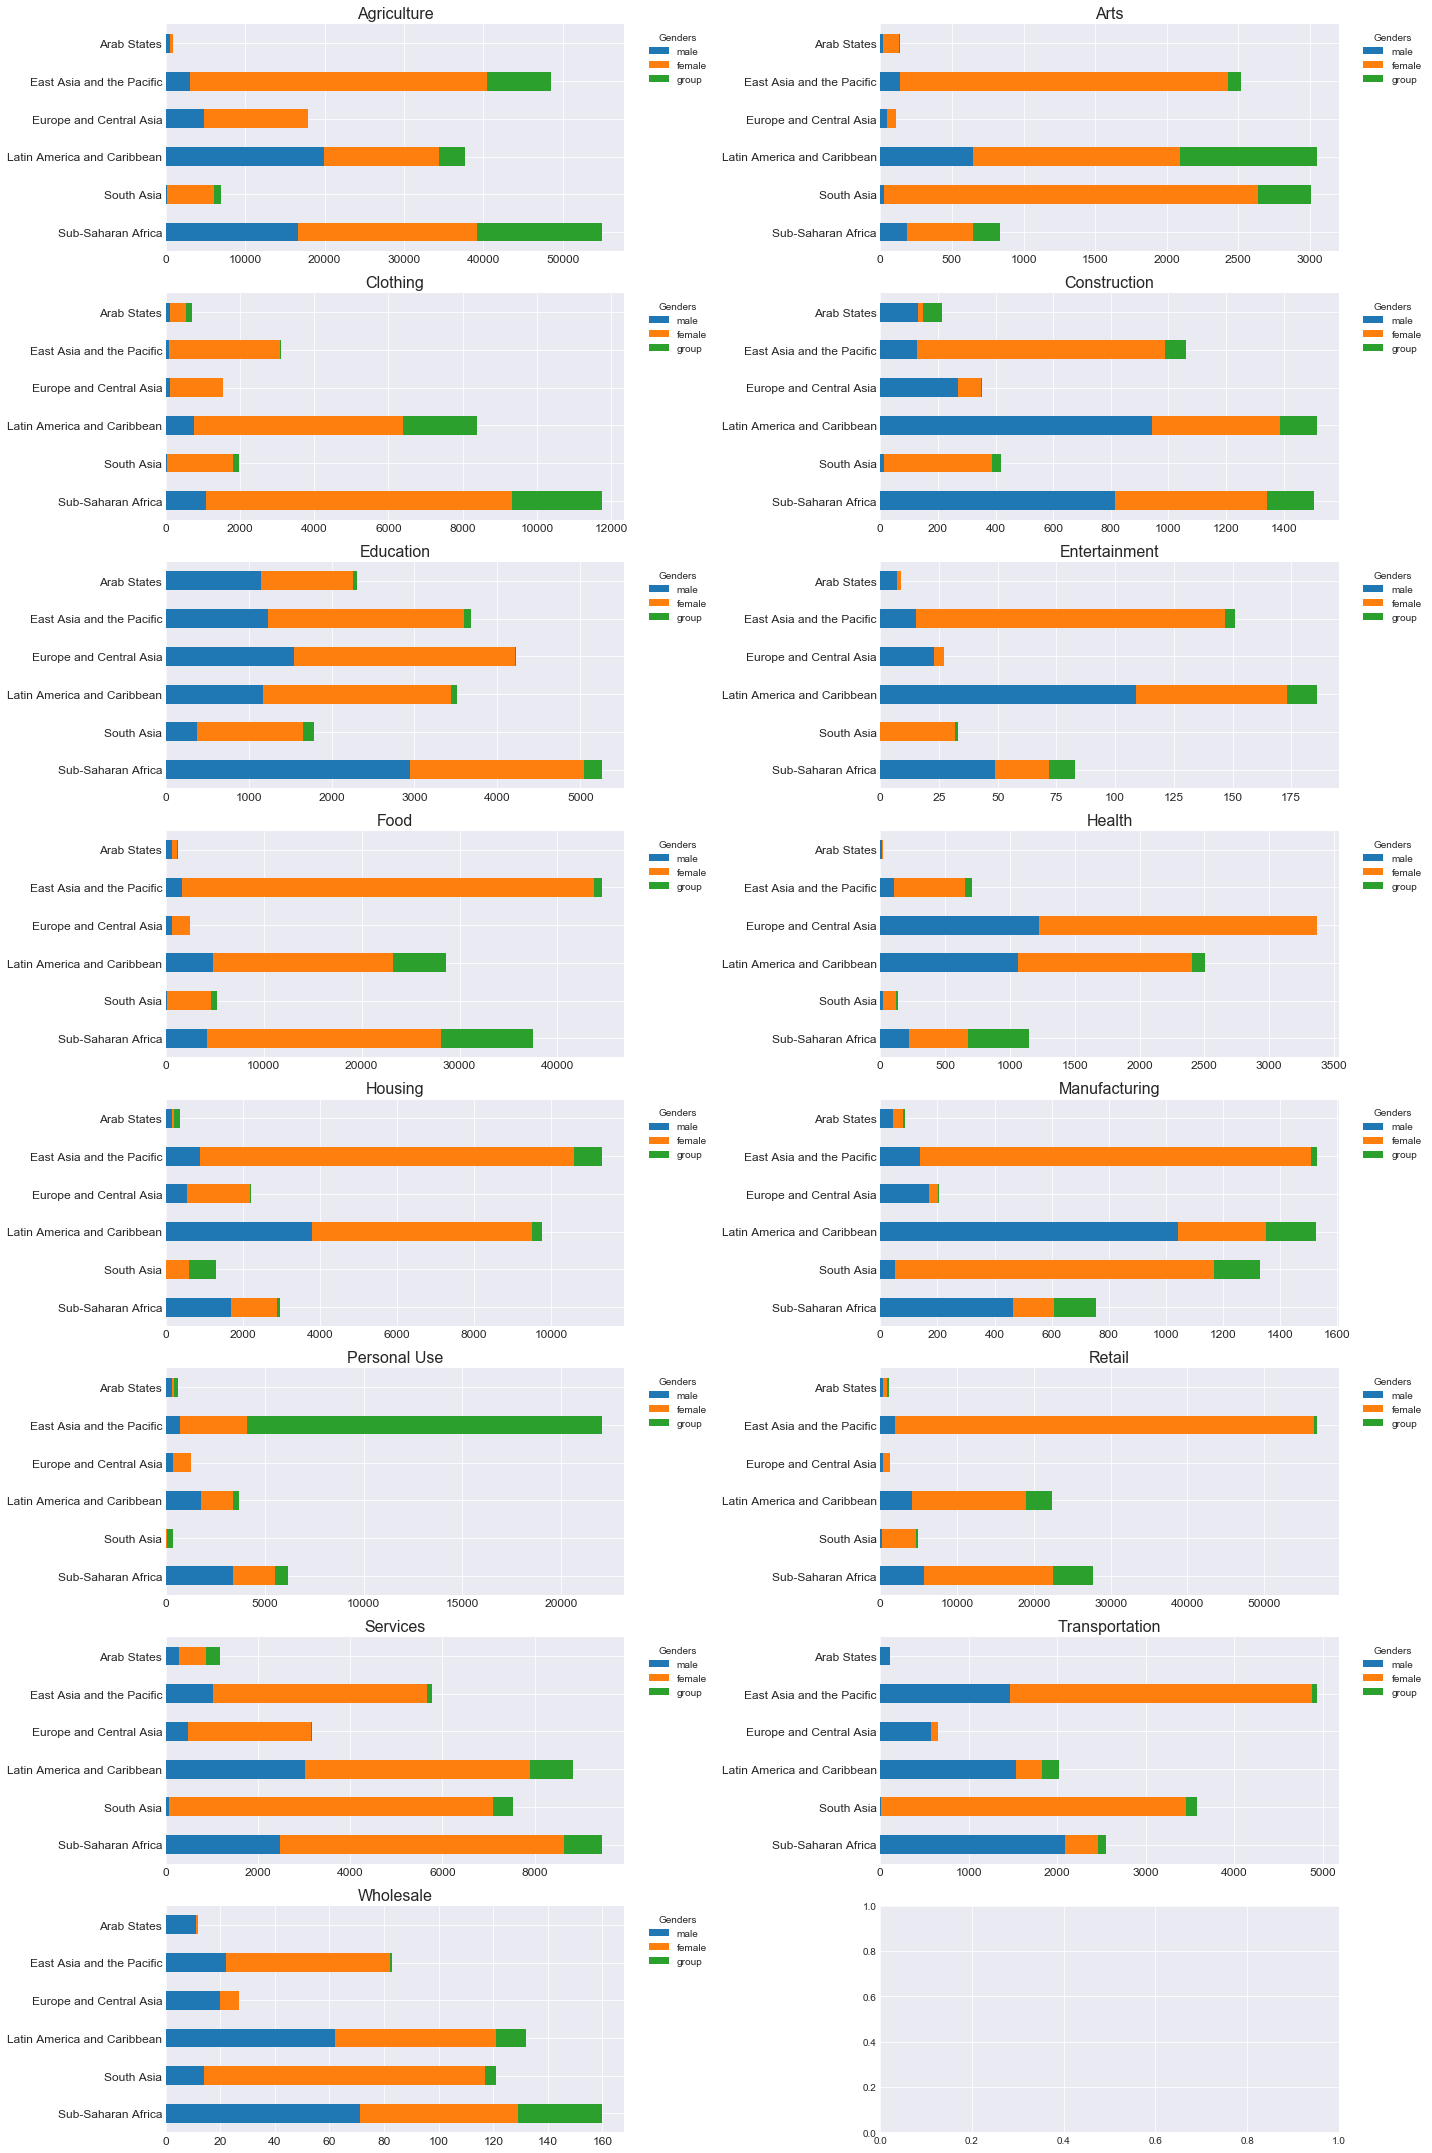

In [82]:
fig,axes = plt.subplots(8, 2, sharex=False, squeeze=False, figsize=(20,30))

for ax,q in zip(axes.ravel(), df_gender_by_sector_region.sector.unique()):
    tmp_df = df_gender_by_sector_region[df_gender_by_sector_region.sector.eq(q)]\
                .dropna()\
                .sort_values(by = ['world_region', 'female', 'male'], ascending=False)
    ax.set_title(q, fontsize=16)  
    ax.yaxis.label.set_visible(False)
    plt.tight_layout()
    superplot = tmp_df.plot.barh(x = 'world_region', ax = ax, fontsize = 12, stacked=True)
    superplot.legend(loc='upper right', title = 'Genders', bbox_to_anchor=(1.2, 1))

Если рассматривать гендерную структуру заемщиков по секторам в разрезе стран, то мы видим, что регионы Южной и Восточной Азии подтверждают свое отличие в гендерной структуре заемщиков в пользу женщин, даже в таких исконно мужских отраслях как строительство, производство и транспорт. В графике Personal Use заметно ярко-выраженное отличие по гендерной структуре и количеству заявок из Восточной Азии, которое выбивается на фоне общей картины. Среди более чем 20-ти тысяч заявок, меньше пяти тысяч относятся не к групповым. Можно провести более детальный анализ, на какие именно цели расходуются потреб кредиты коллективными заемщиками, чтобы уточнить корректность занесения данных.

# Домашнее задание 2

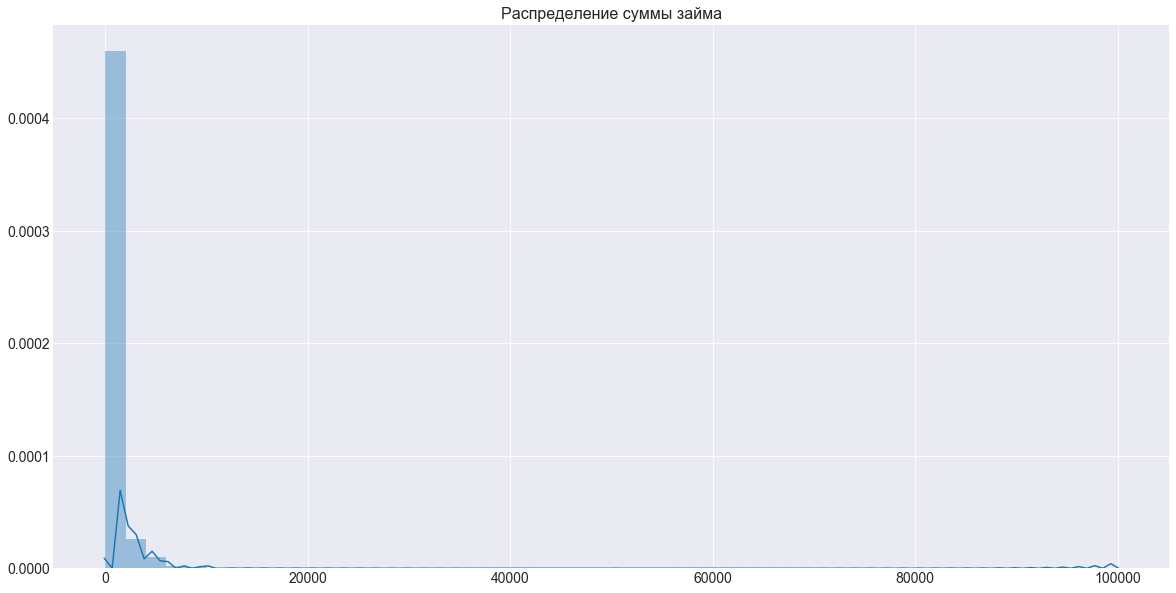

In [83]:
plt.figure(figsize=(20,10))
plt.title("Распределение суммы займа", fontsize=16)
plt.tick_params(labelsize=14)

sns.distplot(df_kiva_loans['loan_amount'], axlabel=False)
plt.show()

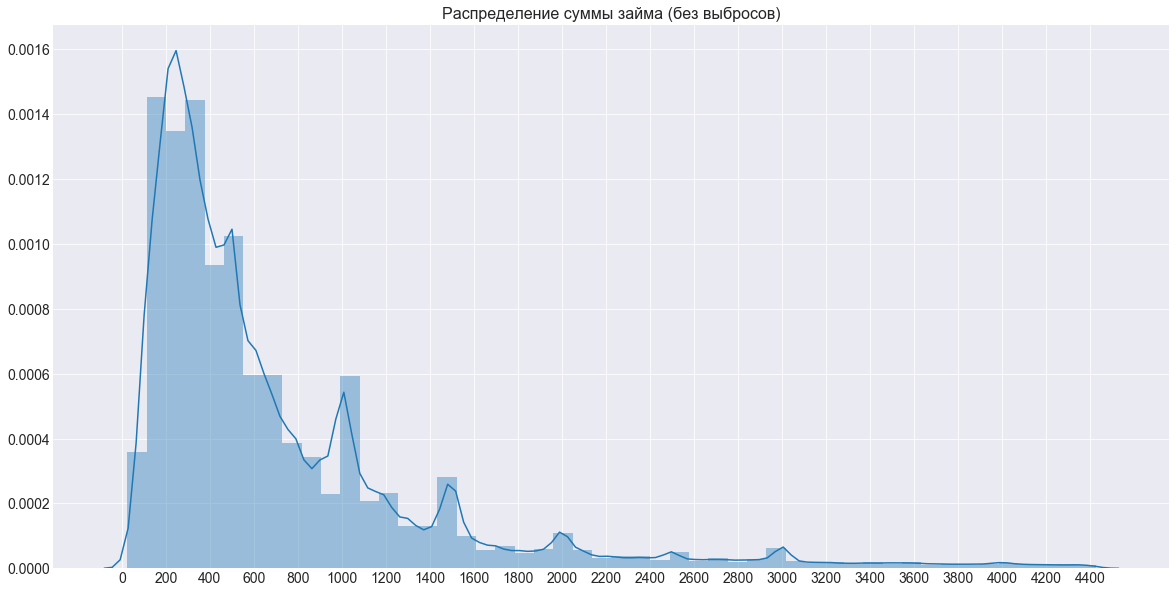

In [84]:
# Наблюдаемое отклонение от среднего
dev = (df_kiva_loans['loan_amount']-df_kiva_loans['loan_amount'].mean()).abs()
# Стандартное отклонение
std = df_kiva_loans['loan_amount'].std()
# Фильтруем исходный набор данных
df_kiva_loans_trimmed = df_kiva_loans[~(dev>3*std)]

plt.figure(figsize=(20,10))
plt.title("Распределение суммы займа (без выбросов)", fontsize=16)
plt.tick_params(labelsize=14)
plt.xticks(np.arange(0, max(df_kiva_loans_trimmed['loan_amount']+1), 200))

sns.distplot(df_kiva_loans_trimmed['loan_amount'], axlabel=False)
plt.show()

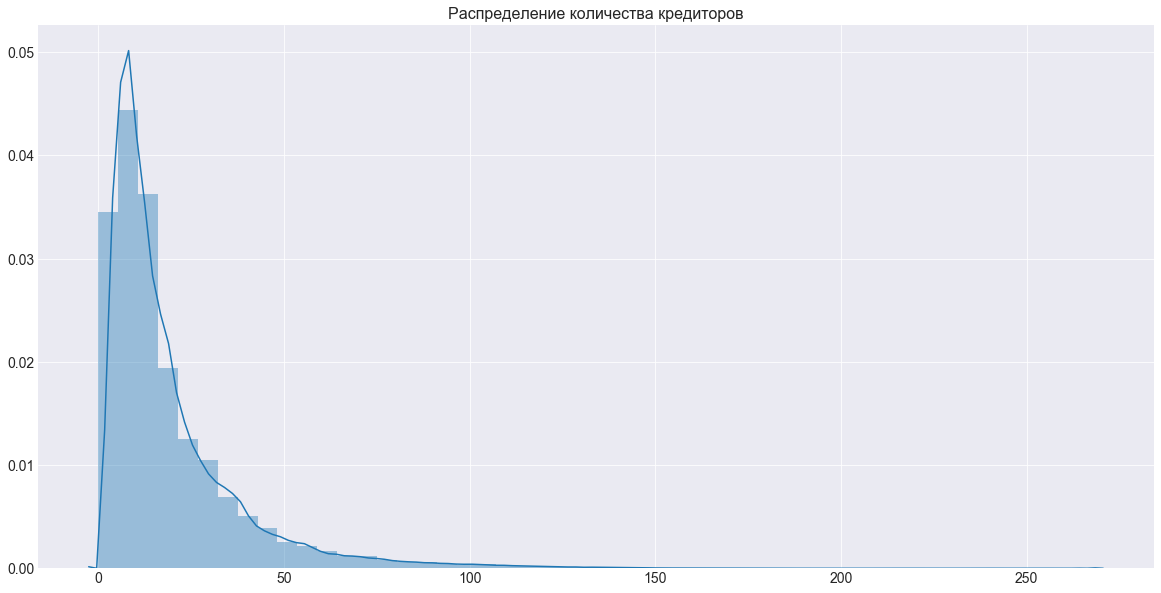

In [85]:
plt.figure(figsize=(20,10))
plt.title("Распределение количества кредиторов", fontsize=16)
plt.tick_params(labelsize=14)

sns.distplot(df_kiva_loans_trimmed['lender_count'], axlabel=False)
plt.show()

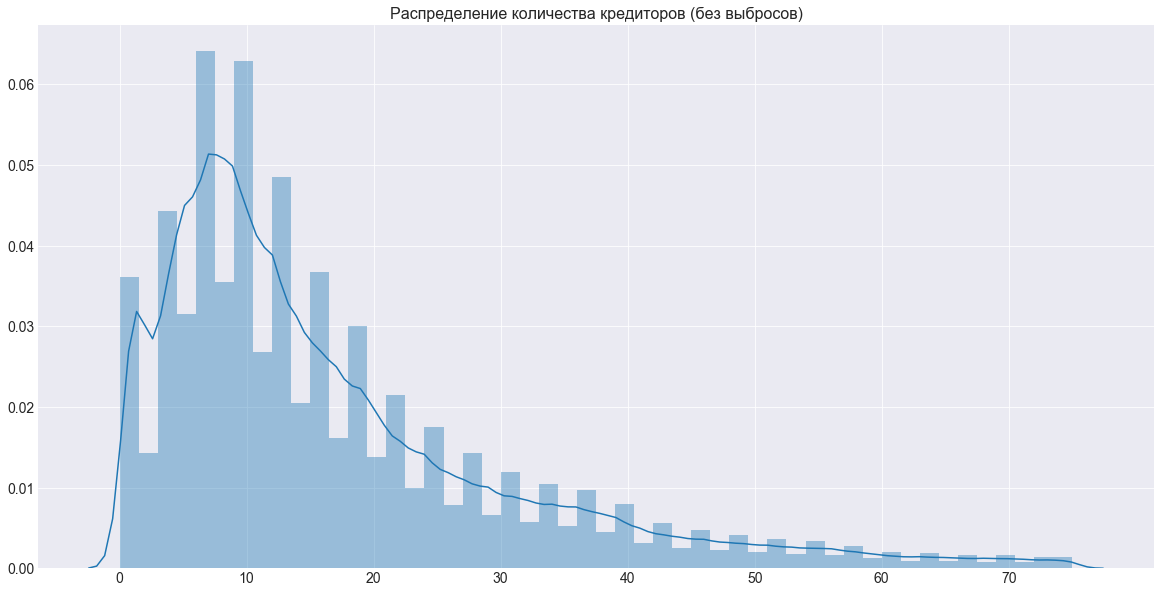

In [86]:
dev = (df_kiva_loans_trimmed['lender_count']-df_kiva_loans_trimmed['lender_count'].mean()).abs()
std = df_kiva_loans_trimmed['lender_count'].std()
df_kiva_loans_trimmed_2 = df_kiva_loans_trimmed[~(dev>3*std)]

plt.figure(figsize=(20,10))
plt.title("Распределение количества кредиторов (без выбросов)", fontsize=16)
plt.tick_params(labelsize=14)
plt.xticks(np.arange(0, max(df_kiva_loans_trimmed_2['lender_count']+1), 10))

sns.distplot(df_kiva_loans_trimmed_2['lender_count'], axlabel=False)
plt.show()

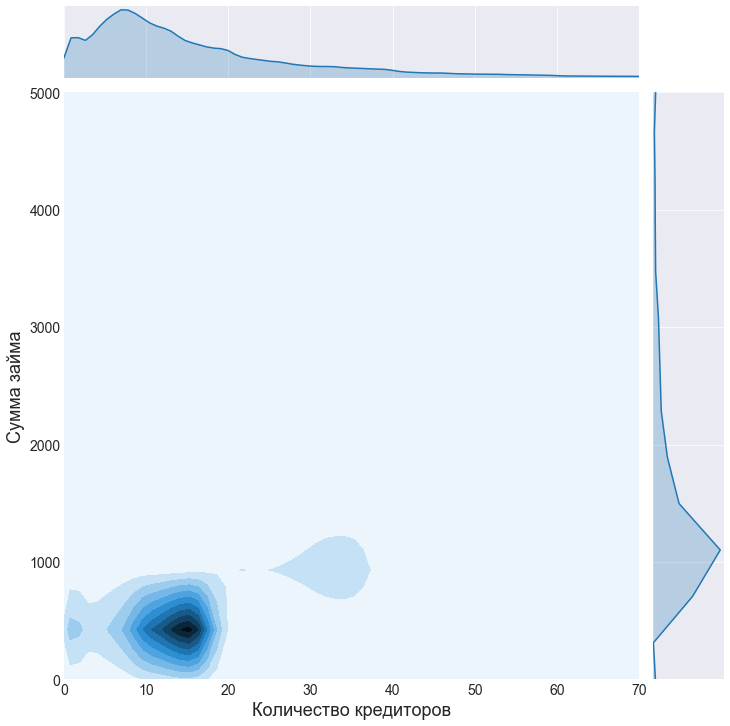

In [122]:
p = sns.jointplot(x="lender_count", y="loan_amount", data = df_kiva_loans_trimmed, kind='kde', height=10, ratio=7, xlim=[0,70] , ylim=[0,5000])\
        .set_axis_labels("Количество кредиторов", "Сумма займа", size=18)
p.ax_joint.tick_params(labelsize=14)

plt.show()

Самое большое скопление заявок сосредоточено с суммами в районе 500 долларов, при этом количество кредиторов определяется вторым десятком чисел с максимумом в районе 16 человек. Также есть кластеры из 1-2 человек на эти же размеры сумм. И из 30-35 человек на большие суммы в районе 1000 долларов.

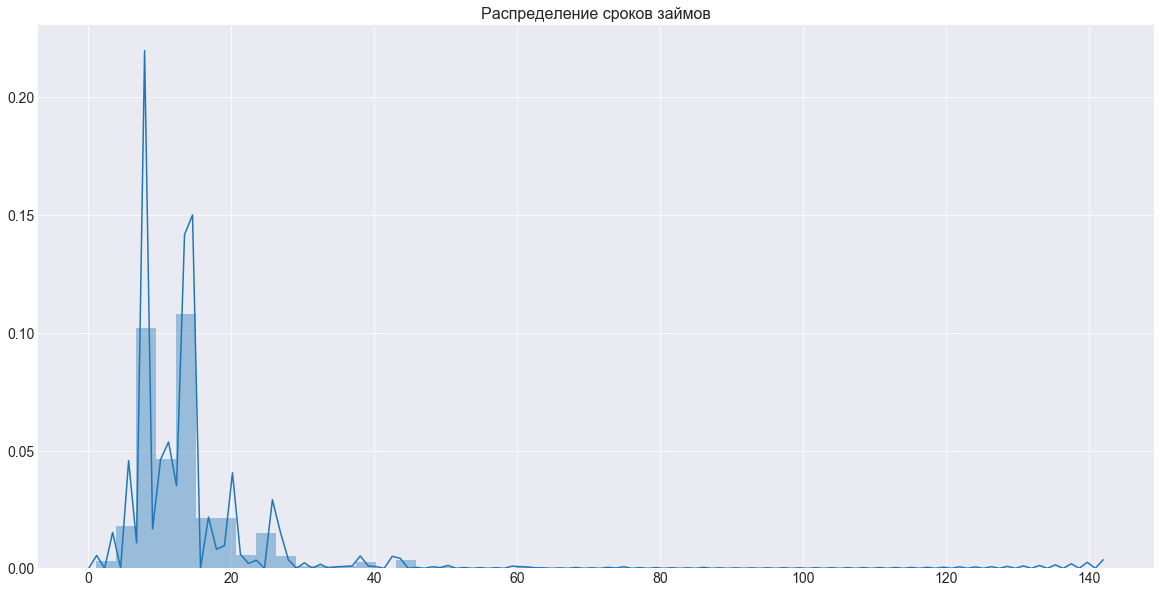

In [89]:
plt.figure(figsize=(20,10))
plt.title("Распределение сроков займов", fontsize=16)
plt.tick_params(labelsize=14)

sns.distplot(df_kiva_loans_trimmed_2['term_in_months'], axlabel=False)
plt.show()

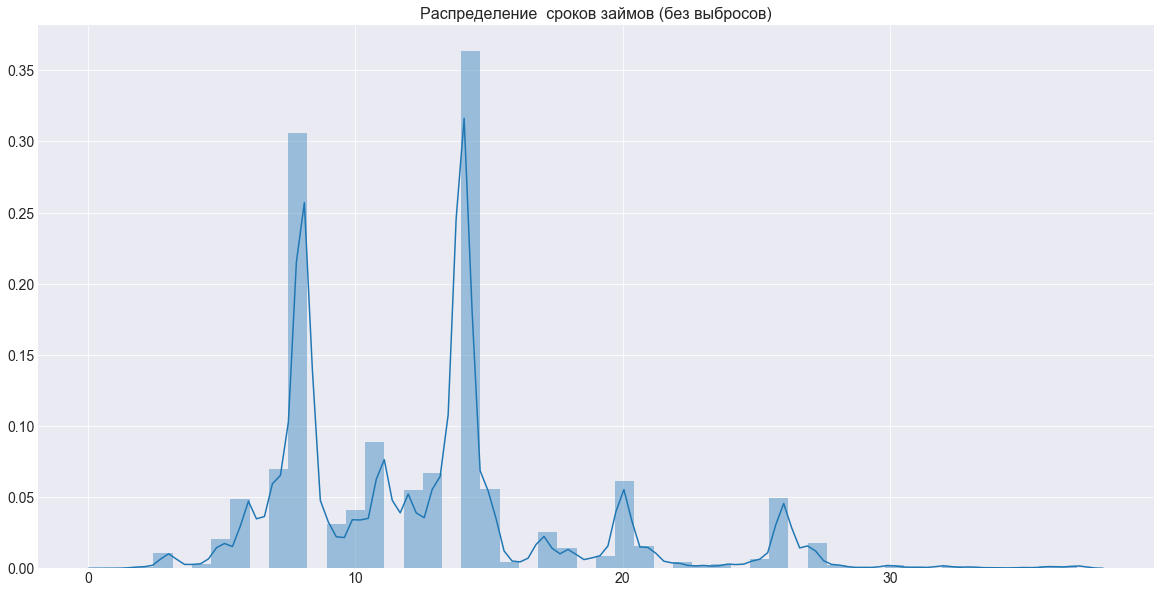

In [90]:
dev = (df_kiva_loans_trimmed_2['term_in_months']-df_kiva_loans_trimmed_2['term_in_months'].mean()).abs()
std = df_kiva_loans_trimmed_2['term_in_months'].std()
df_kiva_loans_trimmed_3 = df_kiva_loans_trimmed_2[~(dev>3*std)]

plt.figure(figsize=(20,10))
plt.title("Распределение  сроков займов (без выбросов)", fontsize=16)
plt.tick_params(labelsize=14)
plt.xticks(np.arange(0, max(df_kiva_loans_trimmed_3['term_in_months']+1), 10))

sns.distplot(df_kiva_loans_trimmed_3['term_in_months'], axlabel=False)
plt.show()

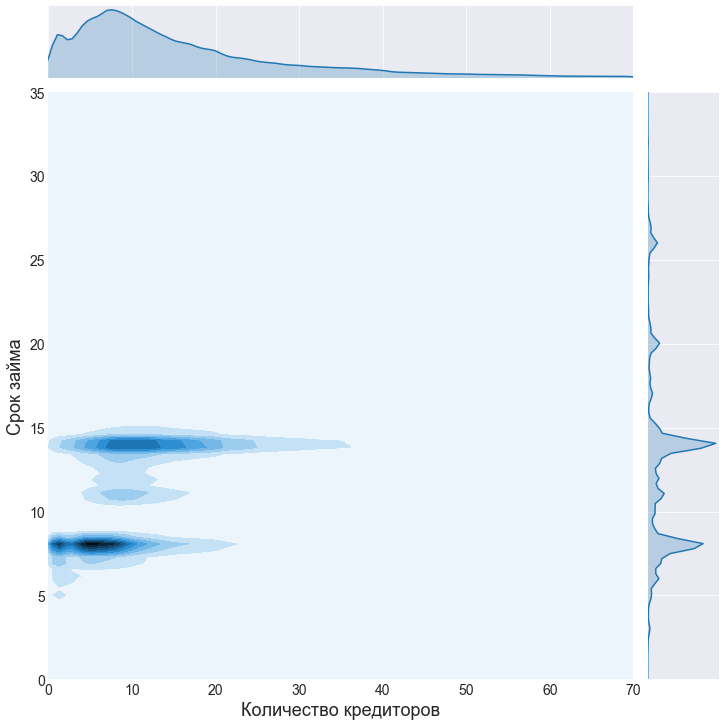

In [127]:
p = sns.jointplot(x="lender_count", y="term_in_months", data = df_kiva_loans_trimmed_3, kind='kde', height=10, ratio=7, xlim=[0,70] , ylim=[0,35])\
        .set_axis_labels("Количество кредиторов", "Срок займа", size=18)
p.ax_joint.tick_params(labelsize=14)

plt.show()

Здесь мы видим три по степени убывания кластера. Самое большое число заявок идут сроком займа 8 месяцев с количеством кредиторов до 10 (наиболее выражены срезы 1-2 и 4-8 кредиторов). Следующий кластер представляет собой заявки с участием 8-12 кредиторов сроком на 14 месяцев. И еще один менее выраженный кластер заявок с участием такого же количества кредиторов сроком на 11-12 месяцев.

# Домашнее задание 3

In [134]:
df_kiva_loans_by_countryMPI = df_kiva_loans[(df_kiva_loans['country'].isin(countries[:].index.values)) & (df_kiva_loans['MPI'] > 0)]\
    .groupby(['country'])['MPI', 'loan_amount', 'term_in_months'].median().reset_index().sort_values(by = 'MPI', ascending=False)

df_kiva_loans_by_countryMPI

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,country,MPI,loan_amount,term_in_months
21,Sierra Leone,0.481071,700.0,10.0
13,Mali,0.444833,1025.0,8.0
11,Liberia,0.433867,275.0,11.0
12,Madagascar,0.390182,250.0,9.0
24,Uganda,0.375300,600.0,10.0
14,Mozambique,0.347364,500.0,18.0
6,Haiti,0.293800,325.0,8.0
23,Togo,0.272333,175.0,8.0
16,Nigeria,0.258811,150.0,17.0
20,Rwanda,0.242800,1625.0,8.0


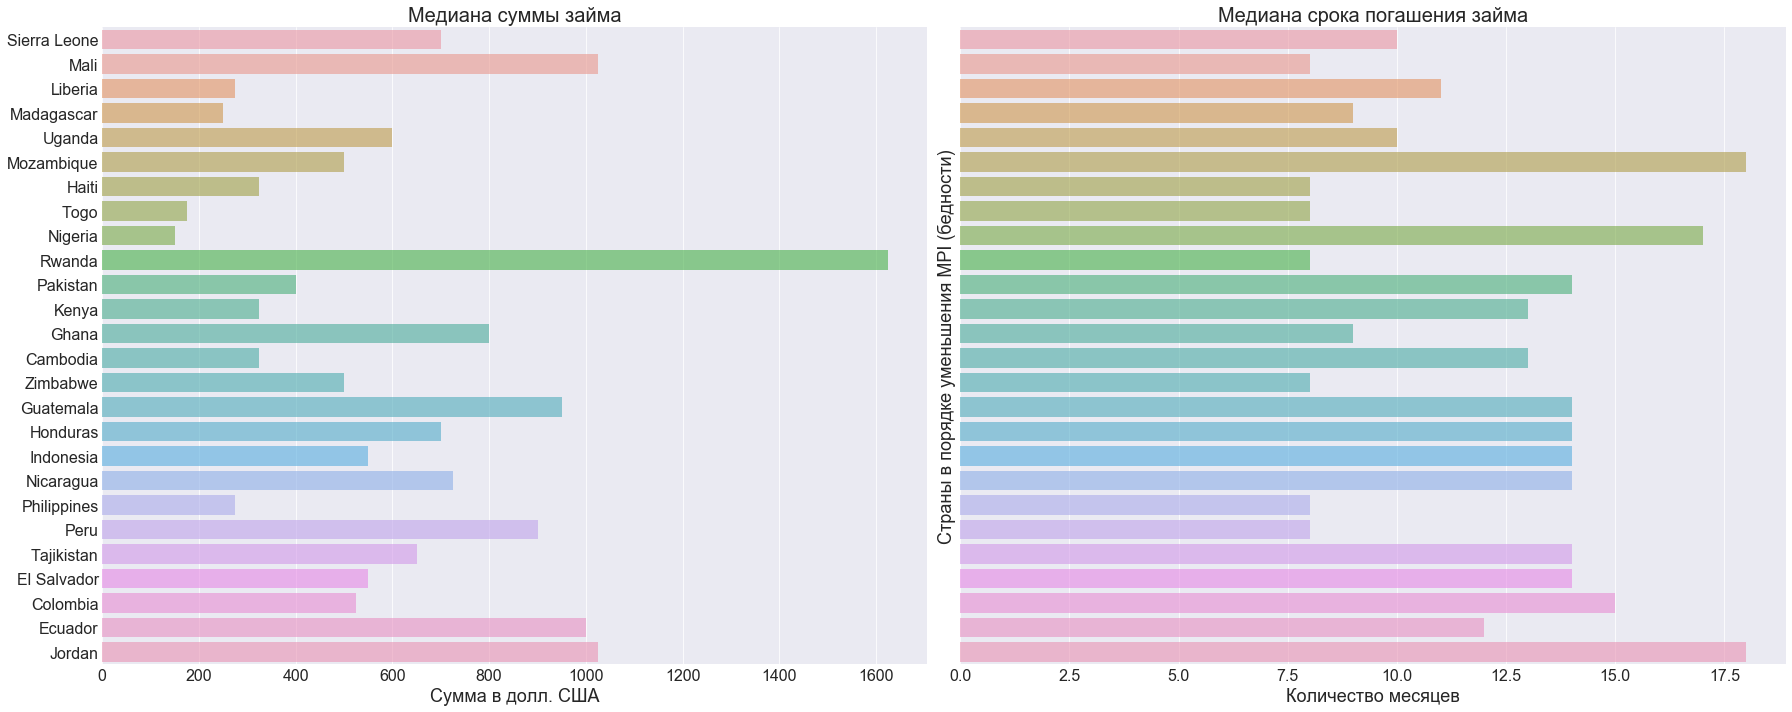

In [135]:
f,ax=plt.subplots(1, 2, sharey=True, figsize=(25,10))

sns.barplot(y='country', x='loan_amount', data =df_kiva_loans_by_countryMPI, alpha=0.6, ax=ax[0])
ax[0].set_title("Медиана суммы займа", fontsize=20)
ax[0].set_xlabel('Сумма в долл. США', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y='country', x='term_in_months', data = df_kiva_loans_by_countryMPI, alpha=0.6, ax=ax[1])
ax[1].set_title("Медиана срока погашения займа", fontsize=20)
ax[1].set_xlabel('Количество месяцев', fontsize=18)
ax[1].set_ylabel('Страны в порядке уменьшения MPI (бедности)', fontsize=18)
ax[1].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

Представление о том, что чем беднее страна, тем меньше сумма заема и больше срок его погашения, данные графики подтверждают лишь частично. Например, показатели медианных значений сумм заявок Мали по сравнению с Эквадором и Иорданией, находящихся на другом конце графика находятся в районе 1000 долларов, при этом сроки погашения займа у богатых стран длиннее.

Нигерия и Руанда показывают большой разрыв в значениях, при этом находятся практически на одном уровне бедности. Медиана суммы заявок Руанды более 1600 долларов при сроке погашения 8 месяцев, тогда как в Нигерии заемщики явно испытывают затруднения с выплатами небольших сумм (до 200 долларов при сроках полтора года)

# Домашнее задание 4

In [141]:

# Наблюдаемое отклонение от среднего
dev = (df_kiva_loans['loan_amount']-df_kiva_loans['loan_amount'].mean()).abs()
# Стандартное отклонение
std = df_kiva_loans['loan_amount'].std()
# Фильтруем исходный набор данных
df_kiva_loans_trimmed = df_kiva_loans[~(dev>3*std)]
df_kiva_loans_trimmed

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,group,irregular,2014-01-01,PAK,South Asia,0.233167
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,IND,South Asia,0.000000
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,PAK,South Asia,0.233167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,...,NaN,13.0,0,NaN,female,monthly,2017-07-25,NaN,NaN,NaN
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,2017-07-26 02:09:43+00:00,13.0,1,NaN,female,monthly,2017-07-25,KEN,Sub-Saharan Africa,0.209375
671202,1340334,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,...,NaN,13.0,0,NaN,group,monthly,2017-07-26,KEN,Sub-Saharan Africa,0.209375
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,NaN,13.0,0,NaN,female,monthly,2017-07-26,KEN,Sub-Saharan Africa,0.209375


In [140]:
df_loans_dates = df_kiva_loans_trimmed.dropna(subset=['disbursed_time', 'funded_time'], how='any', inplace=False)
df_loans_dates

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,group,irregular,2014-01-01,PAK,South Asia,0.233167
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,IND,South Asia,0.000000
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,PAK,South Asia,0.233167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671166,1340251,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,2017-07-22 12:51:42+00:00,13.0,1,NaN,female,monthly,2017-07-21,KEN,Sub-Saharan Africa,0.209375
671170,1340267,25.0,25.0,Livestock,Agriculture,Reviewed loan use in english.,PK,Pakistan,Attock,PKR,...,2017-07-22 13:07:29+00:00,13.0,1,NaN,female,monthly,2017-07-21,PAK,South Asia,0.233167
671177,1340279,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,2017-07-24 12:44:16+00:00,13.0,1,NaN,female,monthly,2017-07-22,KEN,Sub-Saharan Africa,0.209375
671186,1340300,25.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,...,2017-07-25 00:19:01+00:00,13.0,1,NaN,female,monthly,2017-07-24,NaN,NaN,NaN


In [146]:
dates = ['posted_time','disbursed_time']

# df_loans_dates[dates] = df_loans_dates[dates].applymap(lambda x : x.split('+')[0])
df_loans_dates[dates] = df_loans_dates[dates].apply(pd.to_datetime)
df_loans_dates

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,group,irregular,2014-01-01,PAK,South Asia,0.233167
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,IND,South Asia,0.000000
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,PAK,South Asia,0.233167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671166,1340251,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,2017-07-22 12:51:42+00:00,13.0,1,NaN,female,monthly,2017-07-21,KEN,Sub-Saharan Africa,0.209375
671170,1340267,25.0,25.0,Livestock,Agriculture,Reviewed loan use in english.,PK,Pakistan,Attock,PKR,...,2017-07-22 13:07:29+00:00,13.0,1,NaN,female,monthly,2017-07-21,PAK,South Asia,0.233167
671177,1340279,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,2017-07-24 12:44:16+00:00,13.0,1,NaN,female,monthly,2017-07-22,KEN,Sub-Saharan Africa,0.209375
671186,1340300,25.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,...,2017-07-25 00:19:01+00:00,13.0,1,NaN,female,monthly,2017-07-24,NaN,NaN,NaN


In [148]:
# calculate time interval
df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['disbursed_time']-df_loans_dates['posted_time']
df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['time_funding'] / timedelta(days=1)
df_loans_dates

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI,time_funding
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,12.0,12,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167,-14.925451
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,11.0,14,NaN,group,irregular,2014-01-01,PAK,South Asia,0.233167,-14.952176
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,IND,South Asia,0.000000,-15.082025
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,11.0,8,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167,-8.002211
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,14.0,16,NaN,female,monthly,2014-01-01,PAK,South Asia,0.233167,-15.162025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671166,1340251,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,13.0,1,NaN,female,monthly,2017-07-21,KEN,Sub-Saharan Africa,0.209375,-0.983738
671170,1340267,25.0,25.0,Livestock,Agriculture,Reviewed loan use in english.,PK,Pakistan,Attock,PKR,...,13.0,1,NaN,female,monthly,2017-07-21,PAK,South Asia,0.233167,-0.615394
671177,1340279,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,13.0,1,NaN,female,monthly,2017-07-22,KEN,Sub-Saharan Africa,0.209375,-0.961192
671186,1340300,25.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,...,13.0,1,NaN,female,monthly,2017-07-24,NaN,NaN,NaN,-0.048032


In [149]:
# remove outliers +-3 sigma
dev = (df_loans_dates['time_funding']-df_loans_dates['time_funding'].mean()).abs()
std = df_loans_dates['time_funding'].std()
# Keep rows where time_funding interval > 0 only
df_loans_dates_trimmed = df_loans_dates[~(dev>3*std) & (df_loans_dates.loc[:, 'time_funding']>0)]
df_loans_dates_trimmed

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI,time_funding
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,...,4.0,6,NaN,female,irregular,2014-01-01,KEN,Sub-Saharan Africa,0.209375,28.650336
62,653290,4275.0,4275.0,Personal Housing Expenses,Housing,to pay for the construction of a hygienic toil...,VN,Vietnam,Hai Duong,VND,...,14.0,144,"user_favorite, #Low-profit FP, #Post-disbursed...",group,bullet,2014-01-02,NaN,NaN,NaN,24.866169
67,1080150,125.0,125.0,Energy,Services,purchase solar lanterns for resale.,KE,Kenya,NaN,KES,...,3.0,6,NaN,male,irregular,2014-01-02,KEN,Sub-Saharan Africa,0.209375,27.703970
114,1080151,125.0,125.0,Energy,Services,buy solar lanterns for sale.,KE,Kenya,NaN,KES,...,3.0,7,NaN,female,irregular,2014-01-02,KEN,Sub-Saharan Africa,0.209375,27.624109
195,1080149,125.0,125.0,Grocery Store,Food,ncrease my yams stock for sales,KE,Kenya,NaN,KES,...,3.0,6,NaN,female,irregular,2014-01-02,KEN,Sub-Saharan Africa,0.209375,19.566435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668656,1334144,2000.0,2000.0,Weaving,Arts,to increase the physical space of her workshop...,MX,Mexico,Oaxaca,USD,...,13.0,59,"volunteer_pick, #Repeat Borrower, #Biz Durable...",female,bullet,2017-07-05,MEX,Latin America and Caribbean,0.000000,34.570625
668705,1334000,125.0,125.0,Farming,Agriculture,to purchase improved farm inputs that will inc...,NG,Nigeria,Kaduna,NGN,...,19.0,5,"#Vegan, #Parent, #Schooling",male,bullet,2017-07-05,NGA,Sub-Saharan Africa,0.258811,6.782963
668763,1333718,300.0,300.0,Farming,Agriculture,purchase fertilizers.,UG,Uganda,Ishaka,UGX,...,7.0,8,#Elderly,male,monthly,2017-07-05,UGA,Sub-Saharan Africa,0.375300,9.942708
668921,1334147,1900.0,1900.0,Crafts,Arts,"to purchase raw materials (wool, dyes and fire...",MX,Mexico,Oaxaca,USD,...,13.0,62,"#Repeat Borrower, #Unique, #Fabrics, #Job Crea...",female,bullet,2017-07-05,MEX,Latin America and Caribbean,0.000000,34.568808


In [175]:
df_region_median = df_loans_dates_trimmed.groupby(['world_region'])\
    .agg({'loan_amount' : 'median', 'time_funding' : 'median', 'term_in_months' : 'median'})\
    .reset_index()

df_region_median = df_region_median.sort_values(by='time_funding')
df_region_median

,world_region,loan_amount,time_funding,term_in_months
0,Arab States,650.0,3.776863,14.0
4,South Asia,1112.5,9.744039,21.0
1,East Asia and the Pacific,575.0,9.963727,10.0
5,Sub-Saharan Africa,300.0,11.614763,13.0
3,Latin America and Caribbean,750.0,18.583750,13.0
2,Europe and Central Asia,1100.0,27.837870,66.0


In [176]:
df_region_median = df_region_median.sort_values(by='term_in_months')
df_region_median

,world_region,loan_amount,time_funding,term_in_months
1,East Asia and the Pacific,575.0,9.963727,10.0
5,Sub-Saharan Africa,300.0,11.614763,13.0
3,Latin America and Caribbean,750.0,18.583750,13.0
0,Arab States,650.0,3.776863,14.0
4,South Asia,1112.5,9.744039,21.0
2,Europe and Central Asia,1100.0,27.837870,66.0


In [177]:
df_region_median['monthly_repayment'] = df_region_median['loan_amount'] / df_region_median['term_in_months']

In [193]:
df_region_median.T

,1,5,3,0,4,2
world_region,East Asia and the Pacific,Sub-Saharan Africa,Latin America and Caribbean,Arab States,South Asia,Europe and Central Asia
loan_amount,575,300,750,650,1112.5,1100
time_funding,9.96373,11.6148,18.5837,3.77686,9.74404,27.8379
term_in_months,10,13,13,14,21,66
monthly_repayment,57.5,23.0769,57.6923,46.4286,52.9762,16.6667


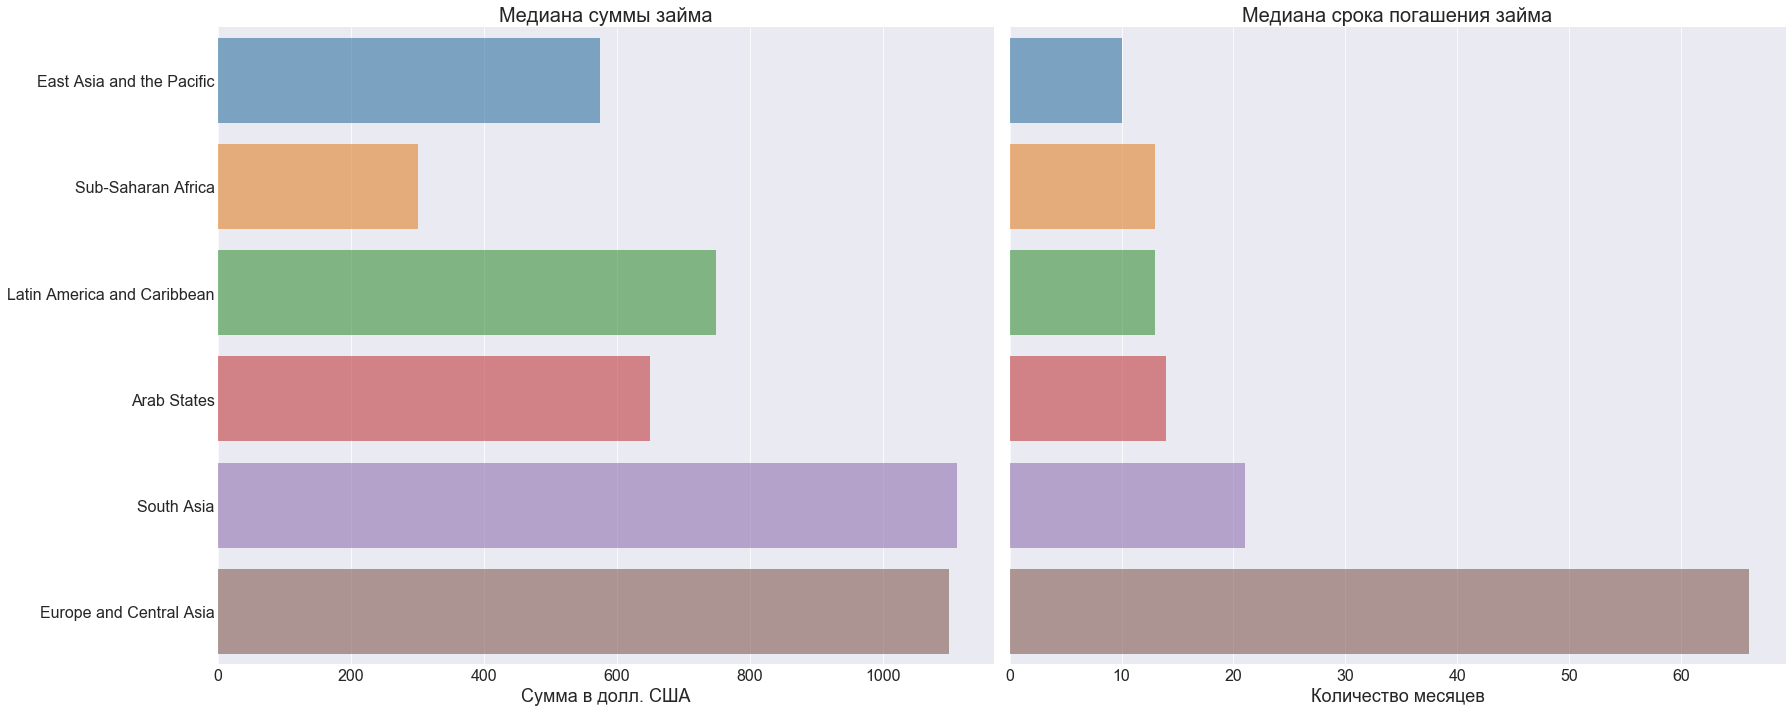

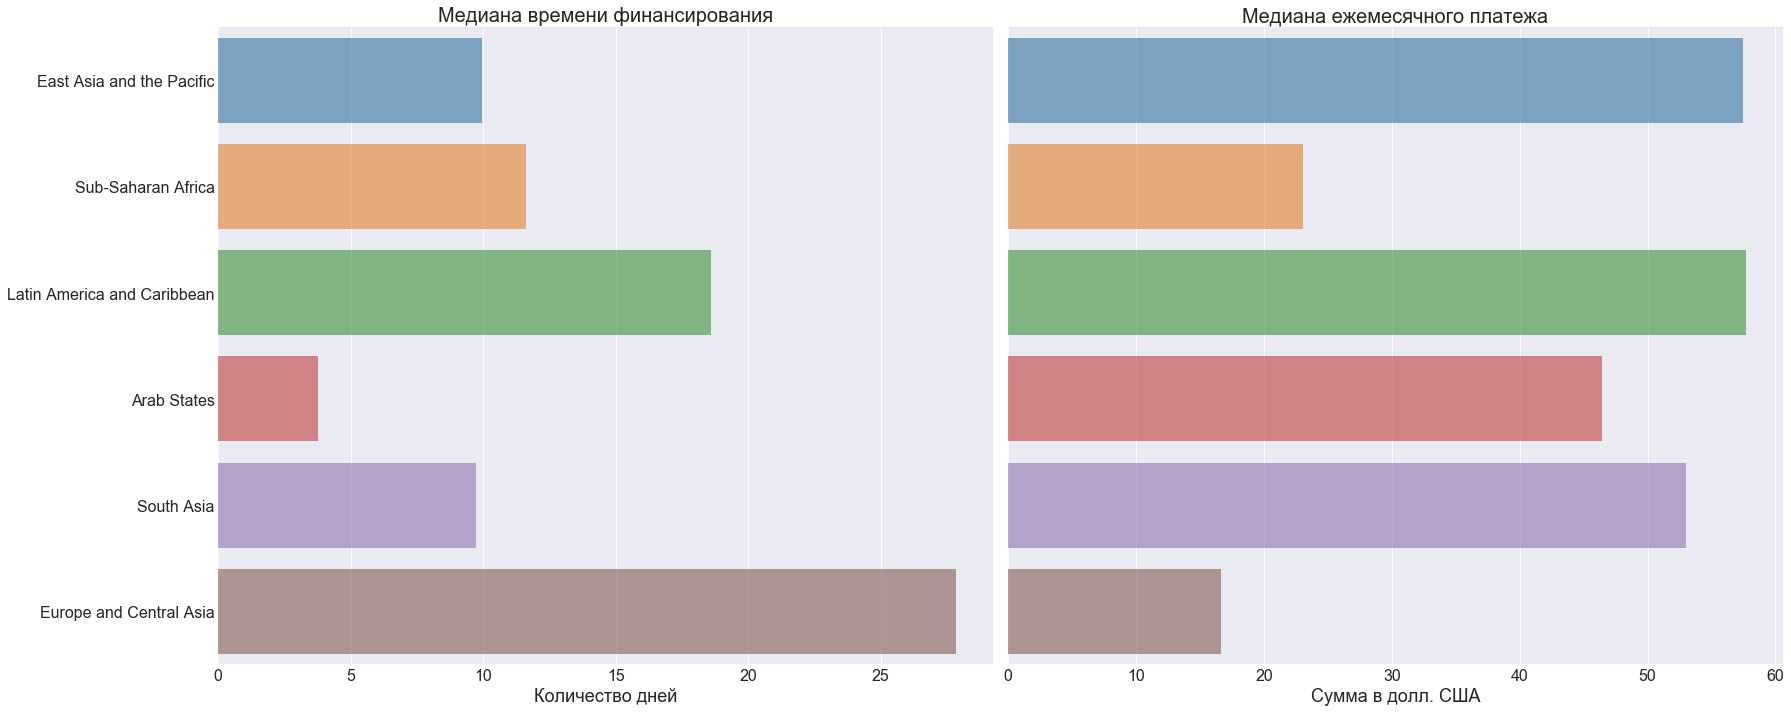

In [205]:
f,ax=plt.subplots(1, 2, sharey=True, figsize=(25,10))

sns.barplot(y = 'world_region', x='loan_amount', data = df_region_median, alpha=0.6, ax=ax[0])
ax[0].set_title("Медиана суммы займа", fontsize=20)
ax[0].set_xlabel('Сумма в долл. США', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y = 'world_region', x ='term_in_months', data = df_region_median, alpha=0.6, ax=ax[1])
ax[1].set_title("Медиана срока погашения займа", fontsize=20)
ax[1].set_xlabel('Количество месяцев', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

plt.tight_layout()

f,ax=plt.subplots(1, 2, sharey=True, figsize=(25,10))

sns.barplot(y= 'world_region', x='time_funding', data = df_region_median, alpha=0.6, ax=ax[0])
ax[0].set_title("Медиана времени финансирования", fontsize=20)
ax[0].set_xlabel('Количество дней', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y= 'world_region', x='monthly_repayment', data = df_region_median, alpha=0.6, ax=ax[1])
ax[1].set_title("Медиана ежемесячного платежа", fontsize=20)
ax[1].set_xlabel('Сумма в долл. США', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)


plt.tight_layout()
plt.show()

## 4.1. Самостоятельная работа

- А в каких странах преобладают мужчины? Группа людей? (п. 2.2.2.)
- Изучите несколько займов с очень большими суммами. Что можно сказать о назначении этих заявок? В каких странах они оформлены? Каков гендерный состав заявителей? (п. 2.4.2.)
- Попробуйте найти связь между странами (регионами), полом заёмщика и суммой заявки. Какие выводы можно сделать из этих данных? (п. 2.4.3.)

## 4.2. Домашняя работа

Расширьте наш отчёт исследованием следующих вопросов:

- Зависимость пола заёмщика от региона планеты, сектора экономики.
- Влияние такого атрибута займа, как **Количество кредиторов** (lender_count), на суммы и сроки займов.
- Влияние показателя **MPI** (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения.
- Зависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж», в разрезе **макрорегионов**.